# **Salifort Motors: Employee Retention**

**Client**: Salifort Motors HR Department

**Client Goal**: Improve employee satisfaction to increase retention rate

The human resources department at Salifort Motors intends to develop initiatives to improve employee satisfaction levels at the company. They have collected data from employees, althought this was done before a business problem or project goal was defined. They have referred to us to analyse their data and attempt to find insightful answers from the data to their question of **what is most likely to make an employee leave their company**.

**Project Goal**: Conduct an EDA on client's data and support the development of HR strategy to improve employee retention by constructing a reliable model to predict employee churn

If we can develop a model that reliably predicts when an employee is likely to quit, it might be possible to identify factors that contribute to their leaving. Given the time and resources needed to find, interview, hire, and on-board new employees, accurately identifying factors that cause employees to leave will be beneficial to Salifort Motors.

# **WORKFLOW**

**A. PLANNING**

1. Import functional packages and data set and get familiar with data structures
2. Conduct an initial EDA and data cleaning (standardise column names, address missing values, duplicates, outliers, etc.)
3. Conduct in-depth EDA to find correlations, trends, and the potential of the data to achieve the client's and project's goals

**B. EARLY-STAGE MODEL CONSTRUCTION**

4. Conduct feature engineering and run an initial regression model
5. Evaluate regression model and expand feature engineering
6. Run a naive Bayes model and re-evaluate features

**C. ADVANCED MODEL CONSTRUCTION**

7. Construct a decision tree model and evaluate results
8. Construct a tree-based GBM model and evaluate results

**D. EXECUTE**

9. Assess the predictive models and interpret model results in terms of client and project goals
11. Make recommendations based on key findings

# **DATA SET DESCRIPTION**

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Imports & Data Inspection

* Import packages
* Load dataset
* Do an initial inspection

### Import packages

In [1]:
# Import packages

# Functional Packages
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Visualisation
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import dtreeviz

# Feature Selection and Preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

# Model Selection and Evaluation
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, 
                             precision_score, f1_score, classification_report, RocCurveDisplay, 
                             roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score)
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from xgboost import plot_importance

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

# Import pickle
import pickle

# Display all columns in dataframes
pd.set_option("display.max_columns", None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Inspect first few rows
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Initial EDA and cleaning

* Understand the variables
* Clean the dataset (column names, outliers, missing values, etc.)

### Gather basic information about the data

In [3]:
# Gather basic information about the data set
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Get descriptive statistics
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

Standardise the column names so that they are all in `snake_case`, correct misspelt names, and make column names more descriptive as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Standardise column names
renamed_columns = ["satisfaction_level", "last_evaluation", "number_of_projects",
       "average_monthly_hours", "years_at_company", "work_accident", "left",
       "promotion_last_5_years", "department", "salary"]

df0.columns = renamed_columns

# Verify name changes
df0.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_at_company  work_accident  left  \
0                    157                 3              0     1   
1                    262                 6              0     1   
2                    272                 4              0     1   
3                    223                 5              0     1   
4                    159                 3              0     1   

   promotion_last_5_years department  salary  
0                       0      sales     low  
1                       0      sales  medium  
2                       0      sales  medium  
3                       0      sales     low  
4                       0      sales     low

### Check missing values & duplicates

Check for any missing values in the data set and for duplicate entries.

In [7]:
# Check for missing values
df0.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_of_projects        0
average_monthly_hours     0
years_at_company          0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect a sample of rows containing duplicates
duplicates = df0.duplicated(keep=False)
df0[duplicates]

satisfaction_level  last_evaluation  number_of_projects  \
0                    0.38             0.53                   2   
1                    0.80             0.86                   5   
2                    0.11             0.88                   7   
3                    0.72             0.87                   5   
4                    0.37             0.52                   2   
...                   ...              ...                 ...   
14994                0.40             0.57                   2   
14995                0.37             0.48                   2   
14996                0.37             0.53                   2   
14997                0.11             0.96                   6   
14998                0.37             0.52                   2   

       average_monthly_hours  years_at_company  work_accident  left  \
0                        157                 3              0     1   
1                        262                 6              0     1   
2                        272                 4              0     1   
3                        223                 5              0     1   
4                        159                 3              0     1   
...                      ...               ...            ...   ...   
14994                    151                 3              0     1   
14995                    160                 3              0     1   
14996                    143                 3              0     1   
14997                    280                 4              0     1   
14998                    158                 3              0     1   

       promotion_last_5_years department  salary  
0                           0      sales     low  
1                           0      sales  medium  
2                           0      sales  medium  
3                           0      sales     low  
4                           0      sales     low  
...                       ...        ...     ...  
14994                       0    support     low  
14995                       0    support     low  
14996                       0    support     low  
14997                       0    support     low  
14998                       0    support     low  

[5346 rows x 10 columns]

In [10]:
# It seems extremely unlikely that there will be duplicate rows given that there are 10 continuous variables.
# A likelihood analysis could be done using Bayes, but this is not necessary and the duplicates may be dropped.

# Drop duplicates and save resulting dataframe in a new variable df1
df1 = df0.drop_duplicates(keep="first")

# Validate data set is free of duplicates and get its shape
print(f"Duplicates: {df1.duplicated().sum()}")
print(f"Shape: {df1.shape}")

Duplicates: 0
Shape: (11991, 10)


### Check outliers


Check for outliers in the data.

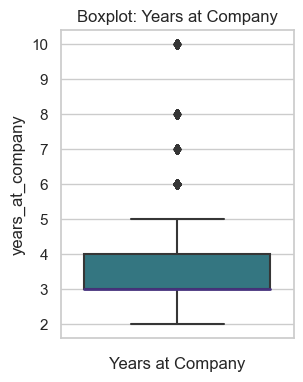

In [11]:
# Create a boxplot to visualize distribution of years_at_company and detect any outliers
plt.figure(figsize=(3,4))
sns.set(style="whitegrid")
sns.boxplot(data=df1, y="years_at_company",palette=[sns.color_palette("viridis")[2]], medianprops={"color": sns.color_palette("viridis")[0], "linewidth": 2})
plt.title("Boxplot: Years at Company")
plt.xlabel("Years at Company")
plt.show()

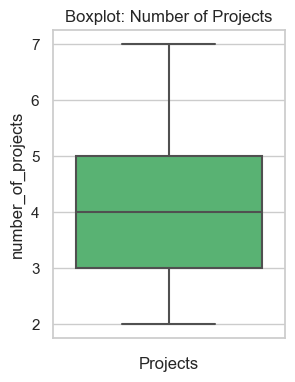

In [12]:
# Boxplot for 'number_of_projects'
plt.figure(figsize=(3,4))
sns.set(style="whitegrid")
sns.boxplot(data=df1, y="number_of_projects", palette=[sns.color_palette("viridis")[4]])
plt.title("Boxplot: Number of Projects")
plt.xlabel("Projects")
plt.show()

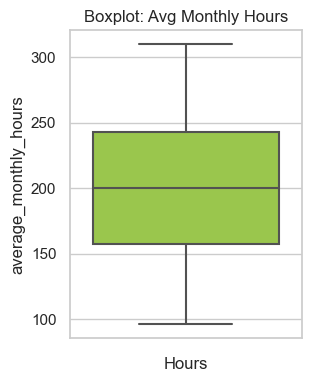

In [13]:
# Boxplot for 'average_monthly_hours'
plt.figure(figsize=(3,4))
sns.set(style="whitegrid")
sns.boxplot(data=df1, y="average_monthly_hours", palette=[sns.color_palette("viridis")[5]])
sns.set_palette("viridis", n_colors=2)
plt.title("Boxplot: Avg Monthly Hours")
plt.xlabel("Hours")
plt.show()

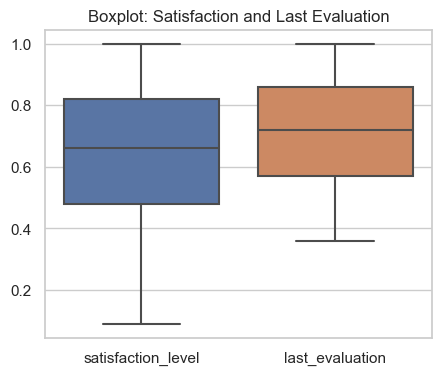

In [14]:
# Boxplot for 'satisfaction_level'
plt.figure(figsize=(5,4))
sns.set(style="whitegrid")
sns.boxplot(data=df1[["satisfaction_level", "last_evaluation"]])
sns.set_palette("viridis", n_colors=3)
plt.title("Boxplot: Satisfaction and Last Evaluation")
plt.show()

In [15]:
# Determine the number of rows containing values outside interquartile range

# Calculate the 25th and 75th percentiles
percentile25 =  df1["years_at_company"].quantile(0.25)
percentile75 =  df1["years_at_company"].quantile(0.75)

# Find the interquartile range
iqr = percentile75 - percentile25

# Get the upper and lower limits based on the IQR
iqr_upper_limit = percentile75 + (1.5 * iqr)
iqr_lower_limit = percentile25 - (1.5 * iqr)

# Create a DataFrame with outliers and get its number of rows to count outliers
outlier_mask = (df1["years_at_company"] < iqr_lower_limit) | (df1["years_at_company"] > iqr_upper_limit)
df_outliers = df1[outlier_mask]
yac_outliers = df_outliers.shape[0]
print(f"No. of outliers in 'years_at_company': {yac_outliers}")

No. of outliers in 'years_at_company': 824


Outliers will be unchanged at this stage. Different methods for dealing with outliers will be employed depending on the model used (e.g., no changes to outliers will be made when using tree-based models, which are robust to outliers).


## Further Exploratory Analysis

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of employees who left vs. stayed
total_employees = df1.shape[0]

left_mask = df1["left"] == 1
employees_left = df1[left_mask].shape[0]

stayed_mask = df1["left"] != 1
employees_stayed = df1[stayed_mask].shape[0]

# Get percentages of employees who left vs. stayed
employees_left_percent = employees_left/total_employees
employees_stayed_percent = employees_stayed/total_employees

print(f"% Employees Left:   {round(employees_left_percent, 2)}\n% Employees Stayed: {round(employees_stayed_percent, 2)}")

% Employees Left:   0.17
% Employees Stayed: 0.83


### Data visualizations

Examine variables of interest using plots to visualise relationships:

* `years_at_company`
* `number_of_projects`
* `satisfaction_level`
* `last_evaluation`
* `average_monthly_hours`
* `promotion_last_5_years`
* `work_accident`

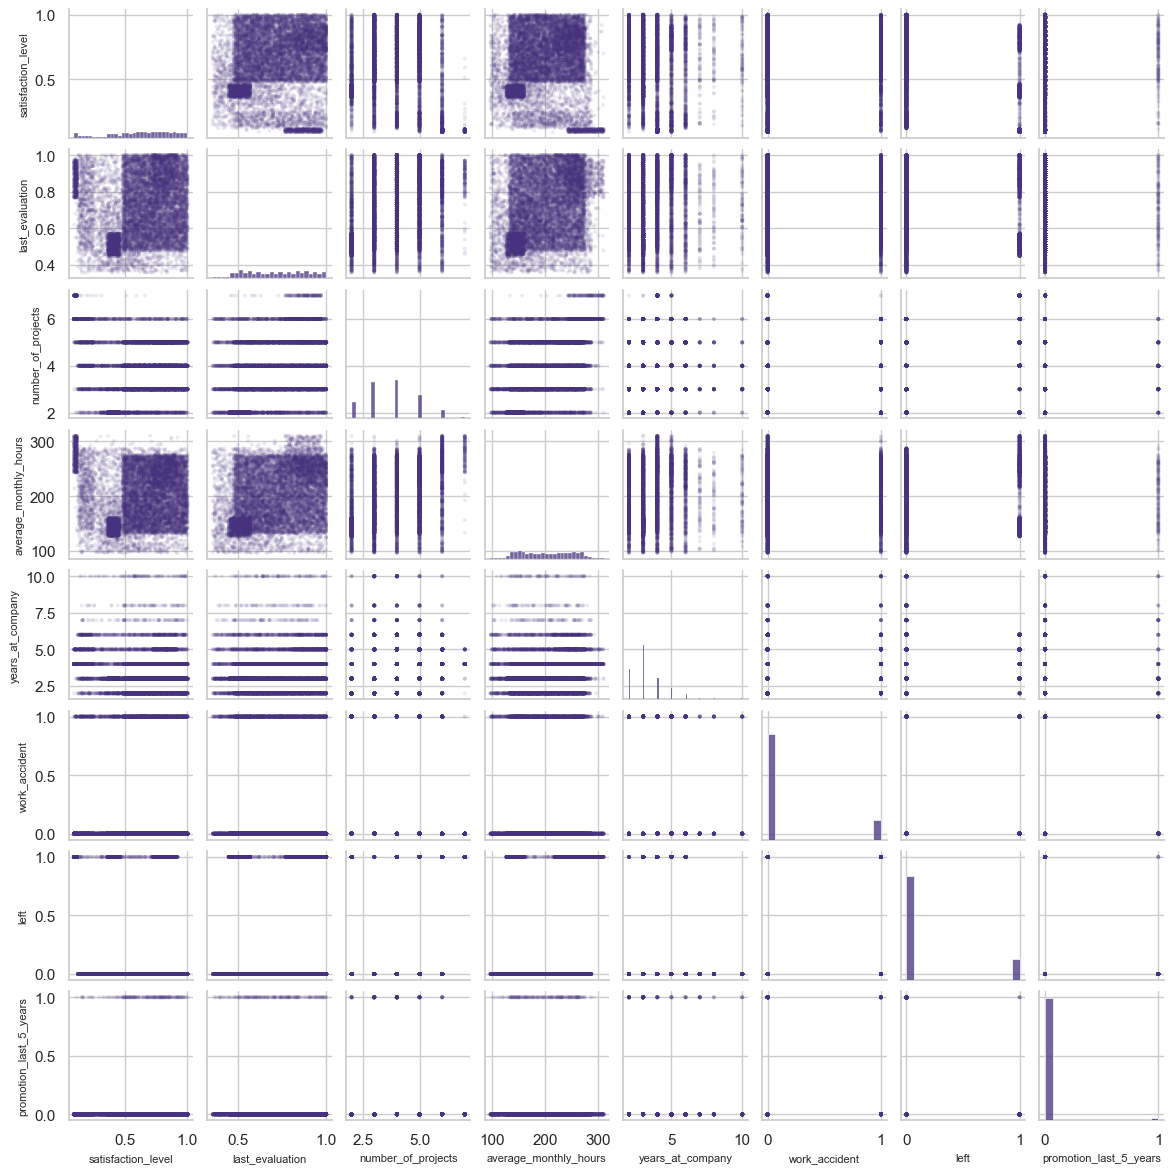

In [17]:
# Draw a sample of the data for a pairplot to make relationships more apparent
sns.set(style="whitegrid")
sns.set_palette("viridis")
pairplot = sns.pairplot(df1, height=1.5,
             plot_kws={"s": 8, "alpha": 0.1, "edgecolor": "none"})

# Make the labels smaller
for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)  # Set x-axis label size
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Set y-axis label size

plt.show()


Apart from showing some interesting concentrations, the pairplot doesn't show too much. There seems to be an interesting split in plot at column 4, row 7: it seems those working fewer and those working many hours have left company. This could mean many things; lower workers may be underperforming and so fired, or less motivated and higher workers may be burning out, feel overworked, or are higher achievers that will get better jobs elsewhere.

In [18]:
# Plot visualisations of distribution of no. employees left by satisfaction, hours worked, promotion, etc.

# Group by years_at_company and compare no. remained vs. no. left
tenure_turnover = df1.groupby(["years_at_company", "left"]).size().unstack(fill_value=0)
tenure_turnover.rename(columns={0: "remained", 1: "left"}, inplace=True)
tenure_turnover.reset_index(inplace=True)

tenure_turnover

left  years_at_company  remained  left
0                    2      2879    31
1                    3      4316   874
2                    4      1510   495
3                    5       580   482
4                    6       433   109
5                    7        94     0
6                    8        81     0
7                   10       107     0

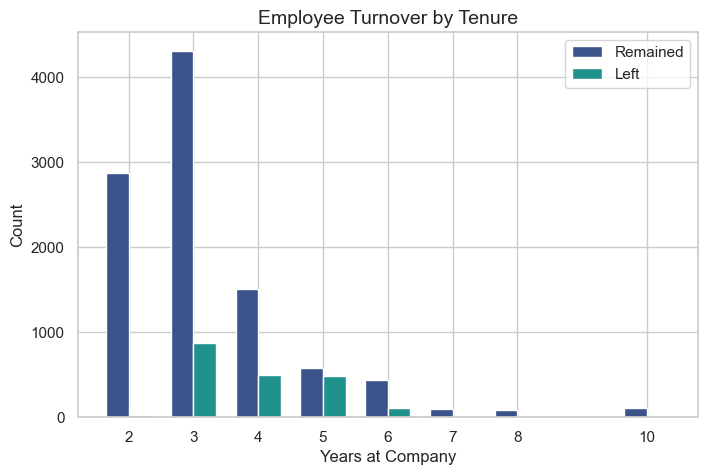

In [19]:
# Create barchart for easier comparison
sns.set(style="whitegrid")
sns.set_palette("viridis", n_colors=3)
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = tenure_turnover["years_at_company"]

remained_bars = ax.bar(x - bar_width/2, tenure_turnover["remained"], width=bar_width, label="Remained")
left_bars = ax.bar(x + bar_width/2, tenure_turnover["left"], width=bar_width, label="Left")

ax.set_xticks(x)
ax.set_xticklabels(tenure_turnover["years_at_company"])

ax.set_xlabel("Years at Company")
ax.set_ylabel("Count")
ax.set_title("Employee Turnover by Tenure", fontsize=14)
ax.legend()

plt.show()

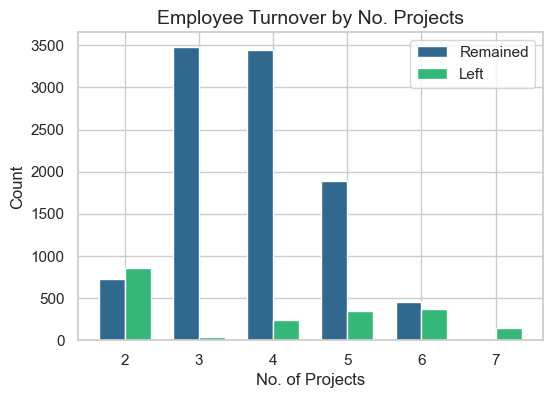

In [20]:
# Do the same for "number_of_projects" 
projects_turnover = df1.groupby(["number_of_projects", "left"]).size().unstack(fill_value=0)
projects_turnover.rename(columns={0: "remained", 1: "left"}, inplace=True)
projects_turnover.reset_index(inplace=True)

tenure_turnover

# Create barchart
sns.set(style="whitegrid")
sns.set_palette("viridis", n_colors=2)
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
x = projects_turnover["number_of_projects"]

remained_bars = ax.bar(x - bar_width/2, projects_turnover["remained"], width=bar_width, label="Remained")
left_bars = ax.bar(x + bar_width/2, projects_turnover["left"], width=bar_width, label="Left")

ax.set_xticks(x)
ax.set_xticklabels(projects_turnover["number_of_projects"])

ax.set_xlabel("No. of Projects")
ax.set_ylabel("Count")
ax.set_title("Employee Turnover by No. Projects", fontsize=14)
ax.legend()

plt.show()

The following was a useful resource for visualising distributions:
https://seaborn.pydata.org/tutorial/distributions.html

In [21]:
# Define a helper function and to plot distributions with KDE of continuous features
def kde(data, feature, group, title):
    '''
    Accepts as arguments a pd.DataFrame (data), a pd.Series for plotting a kernel density estimate distribution (feature),
    and a categorical pd.Series for comparing the feature's KDE distribution according to (group), and a plot title (title).
    '''
    plt.figure(figsize=(5,4))
    sns.set(style="whitegrid")
    sns.set_palette("viridis", n_colors=2)
    sns.histplot(data, x=feature, hue=group, kde=True, common_norm=False)
    plt.title(title, fontsize=14)
    plt.show()


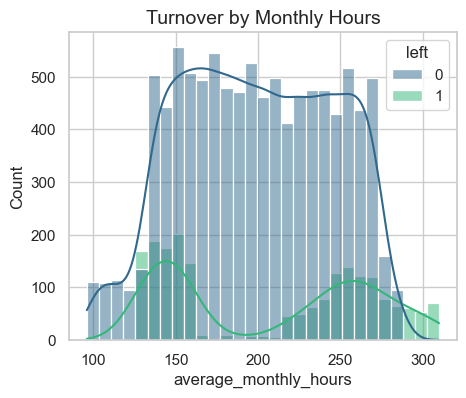

In [22]:
# Apply kde() function to average_monthly_hours
kde(data=df1, feature="average_monthly_hours", group="left", title="Turnover by Monthly Hours")

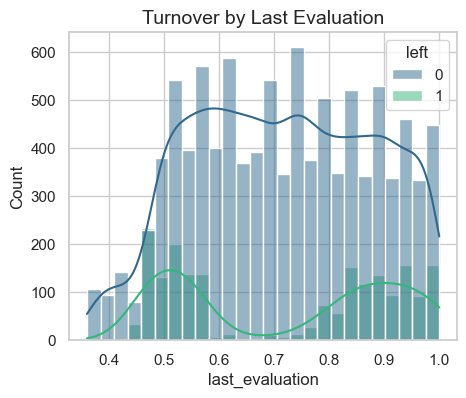

In [23]:
# Apply kde() function to last_evaluation
kde(data=df1, feature="last_evaluation", group="left", title="Turnover by Last Evaluation")

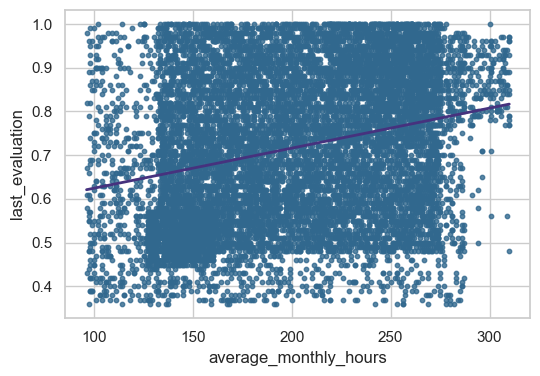

In [24]:
# Given that the above two KDE distributions are very similar, I should check whethere there's a correlation between
# monthly hours and last evaluation.
sns.set(rc={"figure.figsize":(6, 4)})
sns.set(style="whitegrid")
sns.set_palette("viridis", n_colors=2)
sns.regplot(data=df1, x="average_monthly_hours", y="last_evaluation", scatter_kws={"s": 10}, ci=None,
            line_kws={"color": sns.color_palette("viridis")[0], "linewidth": 2, "zorder": 5})
plt.show()

According to the trendline, there is a positive relationship between `average_monthly_hours` and `last_evaluation`. This can be further explored.

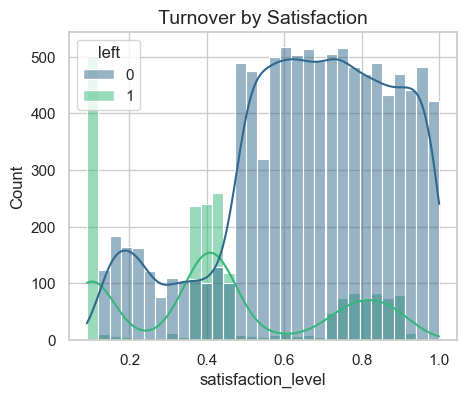

In [25]:
# Apply kde() function to satisfaction_level
kde(data=df1, feature="satisfaction_level", group="left", title="Turnover by Satisfaction")

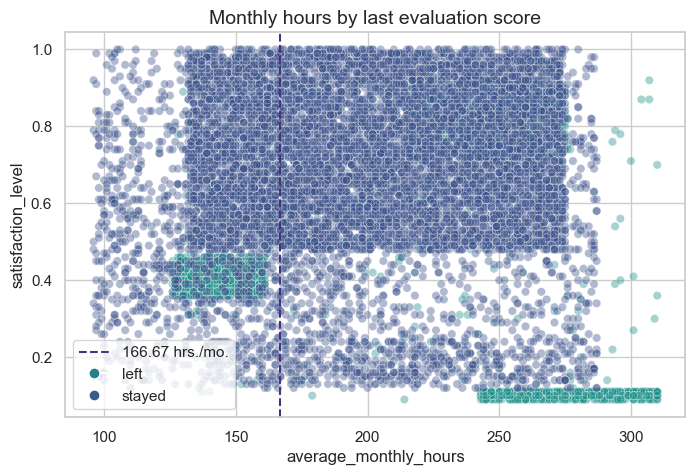

In [26]:
# It would be interesting to visualise the relationship between average_monthly_hours and satisfaction_level

# Create a scatterplot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.set_palette("viridis", n_colors=3)
sns.scatterplot(data=df1, x="average_monthly_hours", y="satisfaction_level", hue="left", alpha=0.4)

# Add the vertical line
plt.axvline(x=166.67, color=sns.color_palette("viridis")[0], label="166.67 hrs./mo.", ls="--")

# Create custom legend handles and labels
legend_handles = [
    Line2D([0], [0], color=sns.color_palette("viridis")[0], linestyle="--", label="166.67 hrs./mo."),
    Line2D([0], [0], marker='o', color='w', label='left', markerfacecolor=sns.color_palette("viridis")[2], markersize=8),
    Line2D([0], [0], marker='o', color='w', label='stayed', markerfacecolor=sns.color_palette("viridis")[1], markersize=8),
]

# Create a legend with custom handles and labels and set the title
plt.legend(handles=legend_handles, loc="best")
plt.title("Monthly hours by last evaluation score", fontsize="14")
plt.show()


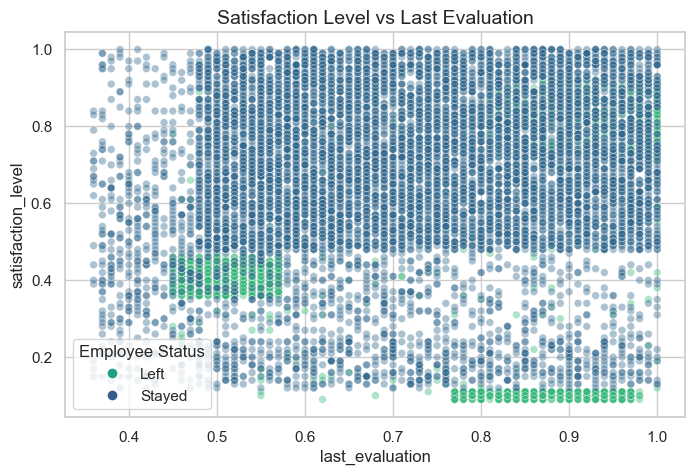

In [27]:
# Inspect satisfaction_level and last_evaluation relationship

# Set figure size, color palette, and style
sns.set(rc={"figure.figsize": (8, 5)})
sns.set(style="whitegrid")
sns.set_palette("viridis", n_colors=4)

# Create a scatterplot with hue based on 'left' variable
sns.scatterplot(data=df1, x="last_evaluation", y="satisfaction_level", hue="left", s=30, palette=sns.color_palette("viridis", n_colors=2), alpha=0.4)

# Create custom legend handles and labels
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Left', markerfacecolor=sns.color_palette("viridis")[3], markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Stayed', markerfacecolor=sns.color_palette("viridis")[1], markersize=8),
]

# Create a legend with custom handles and labels and set the title
plt.legend(handles=legend_handles, loc="best", title="Employee Status")

# Add a legend and title
plt.title("Satisfaction Level vs Last Evaluation", fontsize=14)

plt.show()


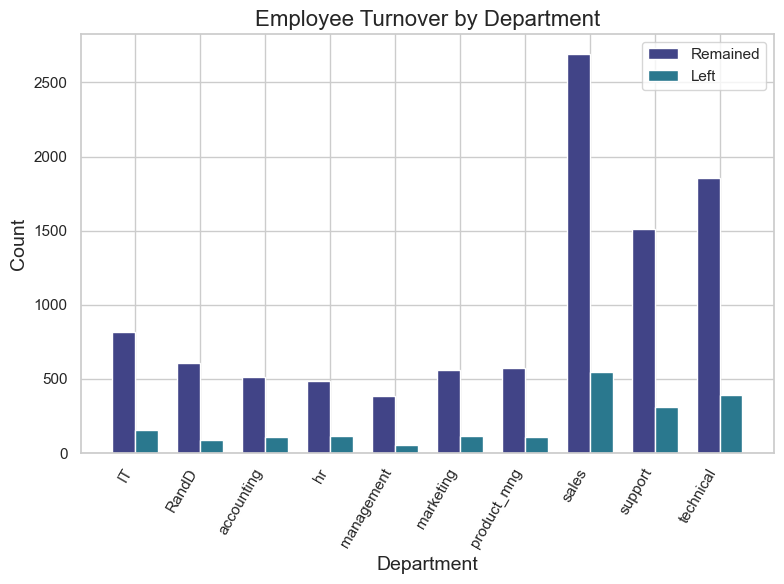

In [28]:
# Plot turnover distribution by department
dept_turnover = df1.groupby(["department", "left"]).size().unstack(fill_value=0)
dept_turnover.rename(columns={0: "remained", 1: "left"}, inplace=True)
dept_turnover.reset_index(inplace=True)

# Set figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Set the color palette and style
sns.set(style="whitegrid")
sns.set_palette("viridis", n_colors=2)


bar_width = 0.35
x = np.arange(len(dept_turnover["department"]))

remained_bars = ax.bar(x - bar_width/2, dept_turnover["remained"], width=bar_width, label="Remained")
left_bars = ax.bar(x + bar_width/2, dept_turnover["left"], width=bar_width, label="Left")

ax.set_xticks(x)
ax.set_xticklabels(dept_turnover["department"], rotation=60, ha="right")

ax.set_xlabel("Department", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Employee Turnover by Department", fontsize=16)
ax.legend()

plt.tight_layout()
plt.show()


In [29]:
# Calculate the number of employees who left/stayed by promotion in the last 5 years
contingency_table = pd.crosstab(df1["promotion_last_5_years"], df1["left"])
contingency_table

left                       0     1
promotion_last_5_years            
0                       9805  1983
1                        195     8

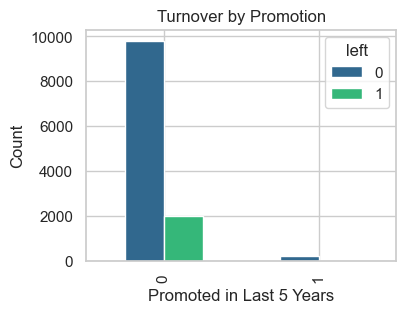

In [30]:
# This relationship is too imbalanced to visualise meaningfully:
sns.set(rc={"figure.figsize":(4, 3)})
sns.set(style="whitegrid")
sns.set_palette("viridis", n_colors=2)

contingency_table.plot(kind="bar", stacked=False)
plt.xlabel("Promoted in Last 5 Years")
plt.ylabel("Count")
plt.title("Turnover by Promotion")
plt.show()

In [31]:
# But the relationship can be scaled to proportions for a more meaningful insight.
ct = contingency_table
not_promoted = ct.iloc[0,0] + ct.iloc[0,1]
promoted = ct.iloc[1,0] + ct.iloc[1,1]

left_not_promoted = ct.iloc[0,1] / not_promoted
left_promoted = ct.iloc[1,1] / promoted

print(f"Proportion of promoted who left:   {round(left_promoted, 2)}\nProportion of unpromoted who left: {round(left_not_promoted,2)}")

Proportion of promoted who left:   0.04
Proportion of unpromoted who left: 0.17


Only 4% of employees promoted in the last 5 years left, while 17% of unpromoted employees left. However, many employees would have been at the company for fewer than five years. An employee who has been at the company for a year or two would not normally be promoted within such a short time. This should be adjusted in the feature engineering stage.

In [32]:
# Check relationship between work accidents and turnover
contingency_table2 = pd.crosstab(df1["work_accident"], df1["left"])
contingency_table2

left              0     1
work_accident            
0              8255  1886
1              1745   105

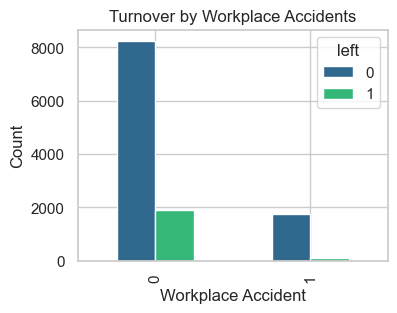

In [33]:
# Plot the contingency table in a bar graph
sns.set(rc={"figure.figsize": (4, 3)})
sns.set(style="whitegrid")
sns.set_palette("viridis", n_colors=2)

contingency_table2.plot(kind="bar", stacked=False)
plt.xlabel("Workplace Accident")
plt.ylabel("Count")
plt.title("Turnover by Workplace Accidents")
plt.show()

In [34]:
# Check averages of select features departmentwise
dept_satisfaction = df1.groupby("department")[["satisfaction_level", "average_monthly_hours", "number_of_projects", "left"]].mean()
dept_satisfaction

satisfaction_level  average_monthly_hours  number_of_projects  \
department                                                                   
IT                     0.634016             200.638320            3.797131   
RandD                  0.627176             201.291066            3.850144   
accounting             0.607939             200.877617            3.834138   
hr                     0.621947             199.371048            3.675541   
management             0.631995             201.529817            3.837156   
marketing              0.634770             199.487370            3.720654   
product_mng            0.629825             198.893586            3.794461   
sales                  0.631349             200.242050            3.777092   
support                0.634822             200.627128            3.820977   
technical              0.627937             201.115419            3.859180   

                 left  
department             
IT           0.161885  
RandD        0.122478  
accounting   0.175523  
hr           0.188020  
management   0.119266  
marketing    0.166419  
product_mng  0.160350  
sales        0.169805  
support      0.171334  
technical    0.173797

There's no clear difference between departments in terms of satisfaction, hour, or no. of projects. But the rate of turnover is slightly lower for RandD and management, though.

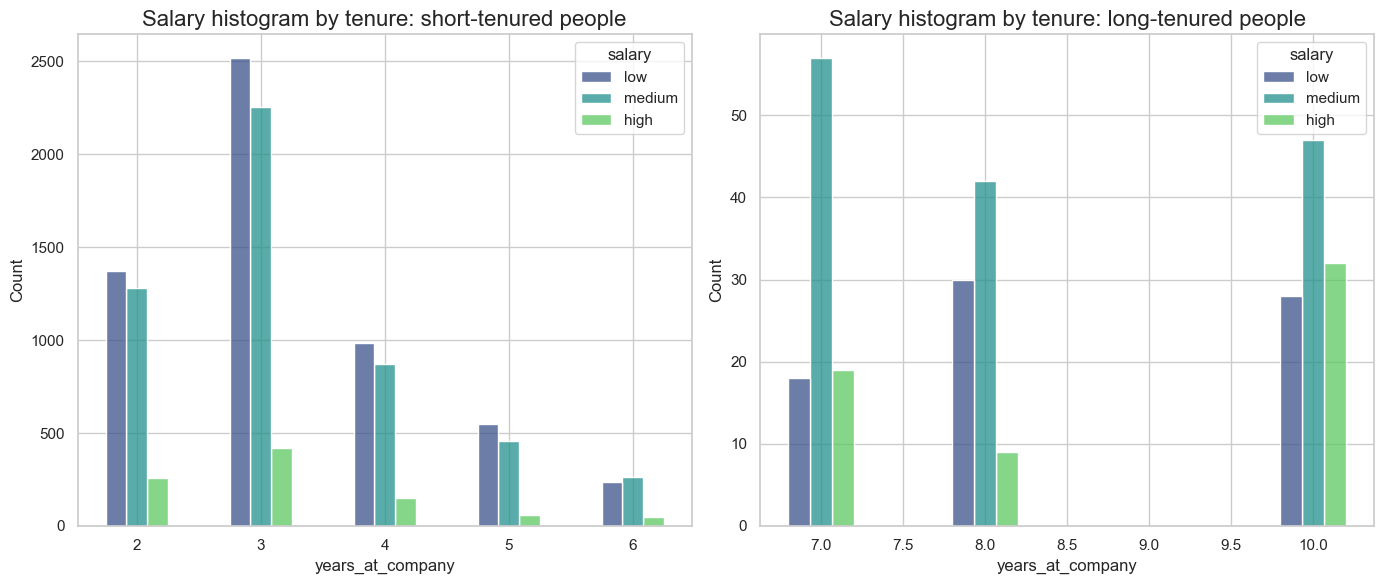

In [35]:
# Inspect short- (<7 years) and long-tenured (>6 years) employees based on salary

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (14,6))
sns.set(style="whitegrid")
sns.set_palette("viridis", n_colors=3)

# Define short-tenured employees
tenure_short = df1[df1["years_at_company"] < 7]

# Define long-tenured employees
tenure_long = df1[df1["years_at_company"] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x="years_at_company", hue="salary", discrete=1, 
             hue_order=["low", "medium", "high"], multiple="dodge", shrink=.5, ax=ax[0])
ax[0].set_title("Salary histogram by tenure: short-tenured people", fontsize=16)

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x="years_at_company", hue="salary", discrete=1, 
             hue_order=["low", "medium", "high"], multiple="dodge", shrink=.4, ax=ax[1])
ax[1].set_title("Salary histogram by tenure: long-tenured people", fontsize=16)

plt.tight_layout()
plt.show()

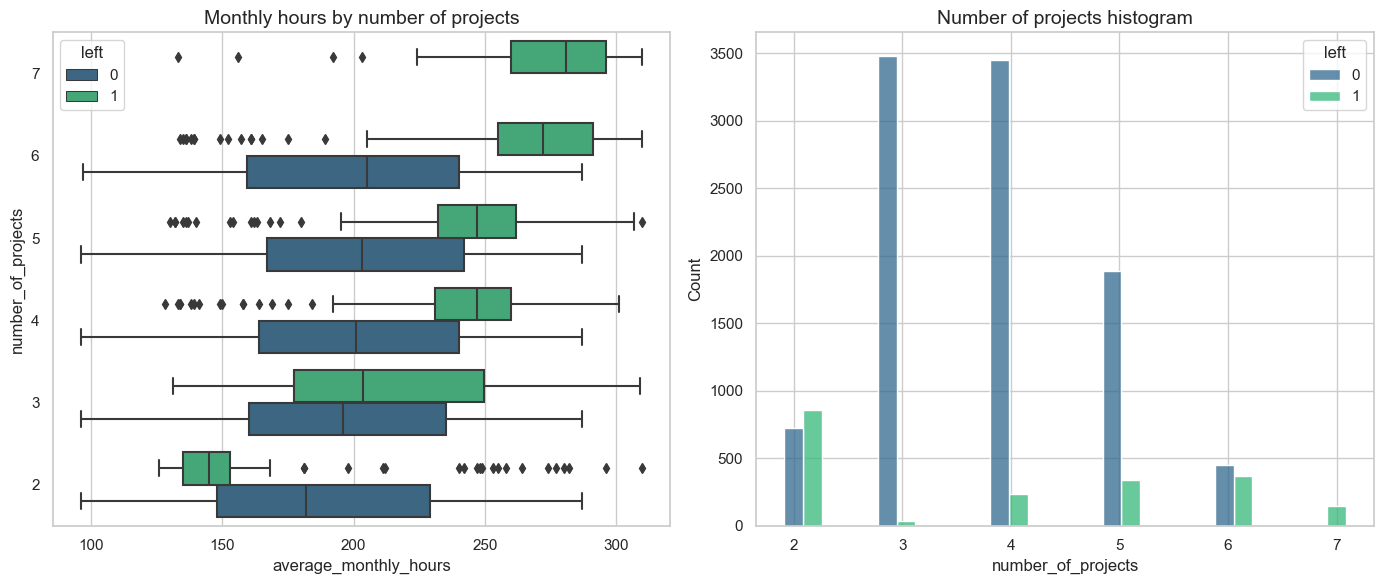

In [36]:
# Plot a stacked box plot comparing employees who left vs stayed by no. of projects & hours worked

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.set(style="whitegrid")
sns.set_palette("viridis", n_colors=2)

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x="average_monthly_hours", y="number_of_projects", hue="left", orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Monthly hours by number of projects", fontsize="14")

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1["left"]==0]["number_of_projects"]
tenure_left = df1[df1["left"]==1]["number_of_projects"]
sns.histplot(data=df1, x="number_of_projects", hue="left", multiple="dodge", shrink=2, ax=ax[1])
ax[1].set_title("Number of projects histogram", fontsize="14")

plt.tight_layout()
plt.show()

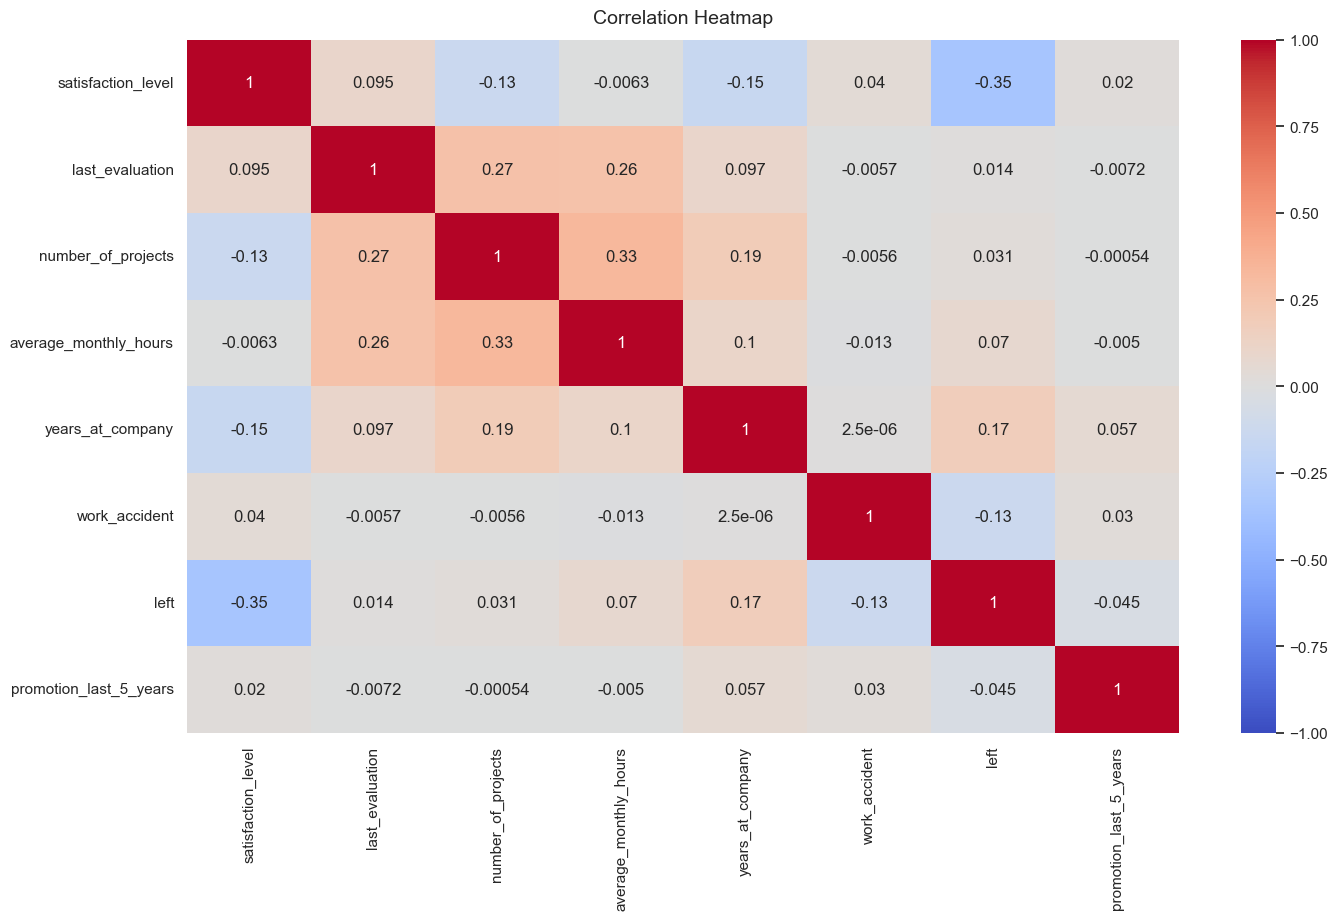

In [37]:
# Plot correlation heatmap to inspect relationships between variables
col_to_drop = ["department", "salary"]
df_num = df1.drop(columns=col_to_drop, axis=1)
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_num.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize":14}, pad=12);

### Insights

There are some unsurprising relationships identified; e.g., employees with the lowest satisfaction had by far the greatest churn.

But there were also some surprising insights, although upon reflection they make industrial psychological sense. Employees tended to leave when they had fairly low review scores, as well as very high review scores. It would make sense that employees with low review scores would leave the company or be dismissed, and those with higher review scores would get jobs elsewhere, especially if the weren't being promoted. What is also surprising is that the same distribution pattern can be seen in both satisfaction levels as well as monthly hours with regards to turnover. One might think that there is a relationship here, but apart from that between evaluation and monthly hours (it makes sense that working more hours means you accomplish more) there isn't a clear trend.

There is a very low rate of promotion, but this should be considered based on who has been at the company for at least 5 years to begin with. This can be inspected in the feature engineering stage.

There is nothing to indicate that there are implausible relationships or values in the data.

At this stage of EDA, I don't think there is much benefit from a deeper exploration of relationships within the data. It would be more fruitful to move on to model construction and then return to EDA if necessary based on what features (if any) are identified as significant predictors of employee turnover. But there could be additional insights to be gained from, say, the relationship between years at the company and satisfaction.

## Feature Engineering & Logistic Regression

### Feature Engineering

At this stage, I'll extract the following two features from the data:

1. **`stagnation`**: It could be informative for a model to know whether an employee may have left due to not being promoted *and* having a high evaluation. A lack of promotion on its own may be due to a lack of performance, but a lack of promotion while performing can be dissatisfying. This may not be the whole story, though, because an employee who has been at the company a short while might not expect a promotion despite having performed well. So, a feature can be extracted to indicate whether an employee meets all three conditions: `years_at_company` >=3, `last_evaluation` >=0.75, and `promotion_last_5_years` =0.

2. **`low_turnover_dept`**: Knowing the exact department of an employee may not be very useful given how many there are and the fact that turnover is an issue across departments. Having this many categorical features for a single piece of information is likely not worthwhile for a logistic regression. There is also no discernable correlation between specific departments and other features, although `RandD` and `management` have lower employee turnover rates. So, a feature can be extracted that indicates whether an employee is part of `RandD` or `management` or not.

Lastly, categorical variables `` will be encoded and variable selected for predictors in preparation of the logistic regression.

In [38]:
# Create a new df object that extracted features will be added to
df2 = df1.copy()

# Extract `stagnation` to indicate if an employee has become stagnant at the company

# Define a function to apply the condition
def stagnation_conditions(row):
    if row["years_at_company"] > 2:
        if row["last_evaluation"] >= 0.75:
            if row["promotion_last_5_years"] == 0:
                return 1
            else:
                return 0
        else:
            return 0
    else:
        return 0

# Apply the stagnation_conditions function to create a new "stagnation" column
df2["stagnation"] = df2.apply(stagnation_conditions, axis=1)
df2.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_at_company  work_accident  left  \
0                    157                 3              0     1   
1                    262                 6              0     1   
2                    272                 4              0     1   
3                    223                 5              0     1   
4                    159                 3              0     1   

   promotion_last_5_years department  salary  stagnation  
0                       0      sales     low           0  
1                       0      sales  medium           1  
2                       0      sales  medium           1  
3                       0      sales     low           1  
4                       0      sales     low           0

In [39]:
# Do the same to extract `low_turnover_dept`
def low_turnover_dept_conditions(row):
    if (row["department"] == "RandD") or (row["department"] == "management"):
        return 1
    else:
        return 0
    
df2["low_turnover_dept"] = df2.apply(low_turnover_dept_conditions, axis=1)

df2.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_at_company  work_accident  left  \
0                    157                 3              0     1   
1                    262                 6              0     1   
2                    272                 4              0     1   
3                    223                 5              0     1   
4                    159                 3              0     1   

   promotion_last_5_years department  salary  stagnation  low_turnover_dept  
0                       0      sales     low           0                  0  
1                       0      sales  medium           1                  0  
2                       0      sales  medium           1                  0  
3                       0      sales     low           1                  0  
4                       0      sales     low           0                  0

In [40]:
# Before preparing variables for a logistic regression, copy df2
df_logreg = df2.copy()

# There are some outliers in the `years_at_company` column
# Deal with outliers: replace all values above and below the upper and lower IQR to the limit values
df_logreg.loc[df_logreg["years_at_company"] > iqr_upper_limit, "years_at_company"] = iqr_upper_limit
df_logreg.loc[df_logreg["years_at_company"] < iqr_lower_limit, "years_at_company"] = iqr_lower_limit

# Check the min and max values 
df_logreg["years_at_company"].describe()

count    11991.000000
mean         3.273455
std          1.057809
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.500000
Name: years_at_company, dtype: float64

In [41]:
# Encode categorical variables

# First encode ordinal categorical features (salary)
# Define order of categories and convert "salary" column to category dtype with custom ordering
salary_order = ["low", "medium", "high"]
df_logreg["salary"] = pd.Categorical(df_logreg["salary"], categories=salary_order, ordered=True)

# Assign numerical codes to the categorical values
df_logreg["salary_level"] = df_logreg["salary"].cat.codes

df_logreg.head(2)

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   

   average_monthly_hours  years_at_company  work_accident  left  \
0                    157               3.0              0     1   
1                    262               5.5              0     1   

   promotion_last_5_years department  salary  stagnation  low_turnover_dept  \
0                       0      sales     low           0                  0   
1                       0      sales  medium           1                  0   

   salary_level  
0             0  
1             1

In [42]:
# Create ordinal categorical encoding for hours worked based on quartiles, called "work_level"
# Define the number of quantiles
num_bins = 4

# Use pd.qcut() to create bins
df_logreg["work_level"], bin_labels = pd.qcut(df_logreg["average_monthly_hours"], q=num_bins, labels=False, retbins=True)

df_logreg.head(5)

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_at_company  work_accident  left  \
0                    157               3.0              0     1   
1                    262               5.5              0     1   
2                    272               4.0              0     1   
3                    223               5.0              0     1   
4                    159               3.0              0     1   

   promotion_last_5_years department  salary  stagnation  low_turnover_dept  \
0                       0      sales     low           0                  0   
1                       0      sales  medium           1                  0   
2                       0      sales  medium           1                  0   
3                       0      sales     low           1                  0   
4                       0      sales     low           0                  0   

   salary_level  work_level  
0             0           0  
1             1           3  
2             1           3  
3             0           2  
4             0           1

In [43]:
# Drop hours, salary, and department columns that already have features extracted from them
columns_to_drop = ["average_monthly_hours", "salary", "department"]
df_logreg_encoded = df_logreg.drop(columns=columns_to_drop, axis=1)

# Verify
df_logreg_encoded.head(3)

satisfaction_level  last_evaluation  number_of_projects  years_at_company  \
0                0.38             0.53                   2               3.0   
1                0.80             0.86                   5               5.5   
2                0.11             0.88                   7               4.0   

   work_accident  left  promotion_last_5_years  stagnation  low_turnover_dept  \
0              0     1                       0           0                  0   
1              0     1                       0           1                  0   
2              0     1                       0           1                  0   

   salary_level  work_level  
0             0           0  
1             1           3  
2             1           3

### Logistic Regression Assumptions


**Logistic Regression Assumptions #1**

Check the assumptions for running a reliable logistic regression model:

1. **Categorical outcome variable** &#x2611;

2. **Independent observations** &#x2611;

In a real-world scenario, I would discuss how the data was collected with the client to determine whether the method of surveying employees influenced the kinds of observations one would expect to receive. I assume that these observations are independent.

3. **No severe multicollinearity among predictors** &#x2611;

The above correlation heatmap shows that there is no multicollinearity among the independent variables &ndash; at least nothing that would affect the model in a significant way.

4. **No extreme outliers**

Outliers have been clipped at IQR.

5. **Sufficiently large sample size** &#x2611;

14999 observations is a sufficiently large size. Splitting the data 70-30 for training and testing will give sets with 10499 and 4500 observations respectively. 

6. **Linearity between X variables and logit(y)**

This will be determined after the construction and training of the model.

Scikit-learn's LogisticRegression uses built-in regularisation (L2), so no scaling is required. The model can be fit and then evaluated.

### Model Building

* Check class balance
* Fit a model that predicts the outcome variable using two or more independent variables
* Check linearity assumption
* Evaluate the model

In [44]:
# Check the balance of responses to determine whether to stratify when splitting testing and training sets, and whether to balance
left = df_logreg_encoded["left"].value_counts()[1]
remained = df_logreg_encoded["left"].value_counts()[0]
total = left + remained
print(f"No. of left=True:  {left}\n% of left=True:    {round(left/total,2)}\n\nNo. of left=False: {remained}\n% of left=False:   {round(remained/total,2)}")

No. of left=True:  1991
% of left=True:    0.17

No. of left=False: 10000
% of left=False:   0.83


There is an imbalance in the responses with the target variable, but nothing in need of balancing. However, the train/test split should be stratified to ensure proportionate numbers of responses are both seen in training and used to evaluate when testing.

**Feature Selection**

I do not expect the following column to have any impact on prediction, and so will drop:

* **`work_accident`** has a negative relationship to turnover. Certainly this is cooincidental: Far more people have not had accidents and have incidentally left, and it wouldn't make sense for people to remain if they have had accidents.

I also anticipate the following will not be significant but will leave it in the data set to see whether it's selected by the feature selector. 

* **`promotion_last_5_years`** only seems relevant if other factors are also true. Thus, I've created `stagnation` for this purpose.

Removing `work_accident` leaves 10 independent variables from which to predict employee churn. I will use Recursive Feature Elimination (RFE) to cut this down further to only five features. Depending on what the decision-tree models produce, I may revisit logistic regression modelling to further refine the features to include.

In [45]:
# Subset target and independent variables for feature selection

y = df_logreg_encoded["left"]

columns_to_drop = ["left", "work_accident"]

X = df_logreg_encoded.drop(columns=columns_to_drop, axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11, test_size=0.25)

### Select Best Features and Fit Model

In [46]:
# Create a SelectKBest feature selector with parallel processing
feature_selector = SelectKBest(score_func=f_classif, k=5)
feature_selector.n_jobs = -1

# Fit the feature selector to training data and transform the features
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Instantiate logistic regression object, including the lbfgs solver so that more threads can be used (n_jobs)
lr_clf = LogisticRegression(solver="lbfgs", n_jobs=-1, random_state=11)

In [47]:
# View feature selection

# Get list of column (feature) names and assign to variable
feature_names = X.columns.to_list()

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the importance scores of all features
all_feature_scores = feature_selector.scores_

# Create a dictionary to map feature names to their importance scores
feature_scores_dict = {feature_names[i]: score for i, score in enumerate(all_feature_scores)}

# Print the selected features and their importance scores
for idx in selected_feature_indices:
    feature_name = feature_names[idx]  # Replace 'feature_names' with your list of feature names
    importance_score = feature_scores_dict[feature_name]
    print(f"Feature: {feature_name}, Importance Score: {importance_score}")
    
selected_feature_names = []
for idx in selected_feature_indices:
    feature_name = feature_names[idx]
    selected_feature_names.append(feature_name)

Feature: satisfaction_level, Importance Score: 1300.8194002462524
Feature: years_at_company, Importance Score: 573.6645368427037
Feature: promotion_last_5_years, Importance Score: 16.04760370202434
Feature: stagnation, Importance Score: 266.007080010426
Feature: salary_level, Importance Score: 137.59122608990913


In [48]:
# Fit the model to selected freatures
lr_clf.fit(X_train_selected, y_train)

LogisticRegression(n_jobs=-1, random_state=11)

#### Regplot

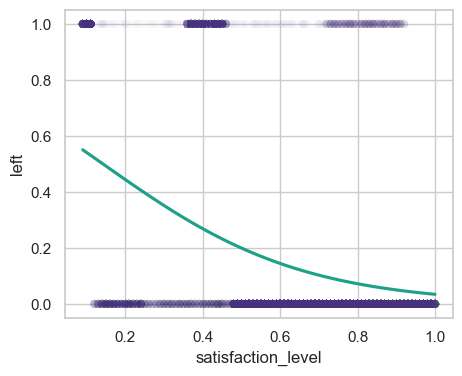

In [49]:
sns.set(rc={"figure.figsize": (5, 4)})
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Create a plot with a logistic curve
sns.regplot(x="satisfaction_level", y="left", data=df_logreg_encoded, logistic=True, ci=None,
            scatter_kws={"color": sns.color_palette("viridis")[0], "alpha": 0.015, "edgecolor": "none"},  # Color for points
            line_kws={"color": sns.color_palette("viridis")[3]})     # Color for the line

plt.show()

## Evaluate Logistic Regression & Expand Feature Engineering

* Make predictions on the test data
* Get evaluation metrics
* Evaluate model
* Expand feature engineering based on results for the next model

This project is meant to support HR strategy decision-making to improve employee retention and thereby save resources on hiring and onboarding new employees. Given this goal, the cost of not predicting employees who will churn somewhat outweighs the cost of mis-identifying employees who will not churn as if they would. Thus, the importance of correctly predicting responses (`left`=1) makes **recall** an important metric on which to evaluate models. However, ensuring that resources on HR's retention strategy are used efficiently to target as few employees at a low risk of leaving, **precision** would also be a good metric on which to select a good model. Therefore, the harmonic mean between these two metrics &ndash; **F1 score** &ndash; will be used to evaluate our models. 

In [50]:
# Make predictions on the test data
y_pred = lr_clf.predict(X_test_selected)

# Calculate evaluation metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Recall Score:", recall)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("F1 Score:", f1)

Recall Score: 0.2469879518072289
Accuracy Score: 0.8342228152101401
Precision Score: 0.5020408163265306
F1 Score: 0.3310901749663526


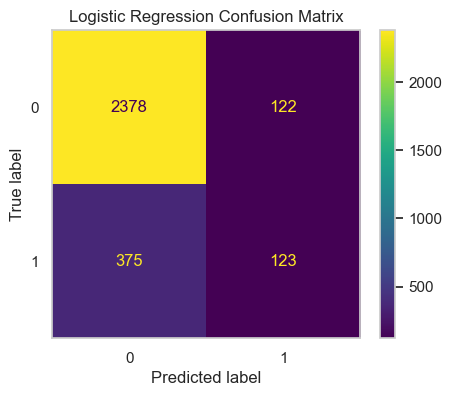

In [51]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = lr_clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr_clf.classes_)
display.plot()
plt.grid(False)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [52]:
# Make a list of selected feature names
selected_feature_names = []
for idx in selected_feature_indices:
    feature_name = feature_names[idx]
    selected_feature_names.append(feature_name)

# Get array of logistic regression model coefficients
lr_coefficients = lr_clf.coef_

# Display DF of each selected feature's coefficient
df_lr_coef = pd.DataFrame(data=lr_coefficients, columns=selected_feature_names)
df_lr_coef

satisfaction_level  years_at_company  promotion_last_5_years  stagnation  \
0           -3.429843          0.430063               -0.965584    0.474109   

   salary_level  
0      -0.63622

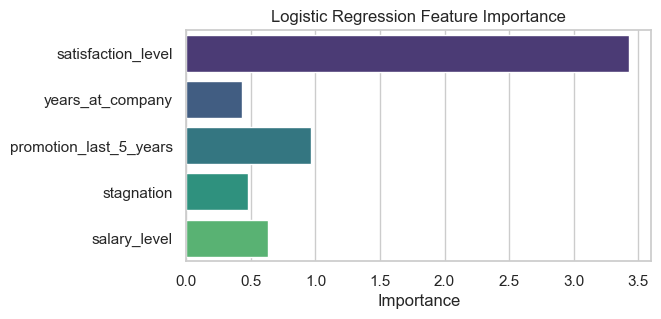

In [53]:
# Visualise feature importance based on coefficient values

# Calculate the absolute values for each column
abs_df_lr_coef = df_lr_coef.abs()

# Plot the coefficient absolute values as a bar plot
plt.figure(figsize=(6, 3))
sns.set_style("whitegrid")
sns.set_palette("viridis")
sns.barplot(data=abs_df_lr_coef, orient="h")
plt.xlabel("Importance")
plt.title("Logistic Regression Feature Importance")
plt.show()

### Check Linearity Assumption

I'll now return to the final assumption for a logistic regression and check that the linearity assumption holds. I do this by using the Box-Tidwell Test, which checks for whether the relationship between the independent variables and the logit of the target (`left`) is linear.

In [54]:
# Check linearity assumption using the Box-Tidwell Test

# `satisfaction_level` is the most significant continuous predictor variable, so that will be chosen for the test
X_continuous = X_train["satisfaction_level"]

# Fit the model without an interaction term
X_log = sm.add_constant(X_continuous)    # Include a constant for the intercept
lr_clf_without_interaction = sm.Logit(y_train, X_log).fit()

# Compute the interaction term
X_log["ln_x"] = np.log(X_continuous)
X_log["interaction_term"] = X_continuous * X_log["ln_x"]

# Fit the logistic regression model with interaction
lr_clf_with_interaction = sm.Logit(y_train, X_log).fit()

# Perform the Box-Tidwell test
interaction_coefficient_p_value = lr_clf_with_interaction.pvalues["interaction_term"]
print(f"Interaction Coefficient P-value: {interaction_coefficient_p_value}")

Optimization terminated successfully.
         Current function value: 0.388341
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.379636
         Iterations 7
Interaction Coefficient P-value: 8.011904478602859e-16


The result of the Box-Tidwell Test provides a current function value of 0.39. This is a relatively low value, indicating that the model fits the data quite well.

We get a very small P-value, which indicates that the linearity assumption may not be met. Given how well the model fits the data, we can expect that there is a relationship between the predictor variable examined here (`satisfaction_level`) and the target. However, this relationship is likely not linear and might be more complex (*this can be seen in the concentration of satsifaction_level values in the [regplot under 4.4](####regplot) above*). Hopefully, this will be captured by subsequent models.

In [55]:
# Get Classification Report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2500
           1       0.50      0.25      0.33       498

    accuracy                           0.83      2998
   macro avg       0.68      0.60      0.62      2998
weighted avg       0.80      0.83      0.81      2998



The recall score for response prediction is only 25%. This is too low to be significantly impactful. The F1 score is higher, given the relatively higher precision score. We should check whether different decision thresholds yield a higher F1 score.

### Decision Thresholds and ROC and PR Curves 

Check at which decision threshold the logistic regression model's F1 score is highest.

In [56]:
# Get predicted probabilities for left=1
y_probs_lr = lr_clf.predict_proba(X_test_selected)[:, 1]

# Define a range of thresholds
thresholds = [0.1, 0.2, 0.25, 0.35, 0.3, 0.4, 0.5, 0.6, 0.7]

# Initialize lists to store metric values
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
pr_auc_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_probs_lr >= threshold).astype(int)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_threshold))
    pr_auc_scores.append(average_precision_score(y_test, y_pred_threshold))

columns = ["model", "accuracy", "precision", "recall", "f1", "roc_auc", "pr_auc"]
model = ["Logistic Regression 0.1",
         "Logistic Regression 0.2",
         "Logistic Regression 0.25",
         "Logistic Regression 0.35",
         "Logistic Regression 0.3",
         "Logistic Regression 0.4",
         "Logistic Regression 0.5",
         "Logistic Regression 0.6",
         "Logistic Regression 0.7"]

# Create a dictionary with column names as keys and corresponding values as lists of model and evaluation scores
lr_threshold_scores = {
    columns[0]: model,
    columns[1]: accuracy_scores,
    columns[2]: precision_scores,
    columns[3]: recall_scores,
    columns[4]: f1_scores,
    columns[5]: roc_auc_scores,
    columns[6]: pr_auc_scores
}

# Create the DataFrame
df_lr_scores = pd.DataFrame(lr_threshold_scores)

df_lr_scores

model  accuracy  precision    recall        f1  \
0   Logistic Regression 0.1  0.621081   0.301863  0.975904  0.461101   
1   Logistic Regression 0.2  0.770180   0.384801  0.640562  0.480784   
2  Logistic Regression 0.25  0.773849   0.348485  0.415663  0.379121   
3  Logistic Regression 0.35  0.798199   0.355014  0.263052  0.302191   
4   Logistic Regression 0.3  0.781521   0.317865  0.275100  0.294941   
5   Logistic Regression 0.4  0.814543   0.408805  0.261044  0.318627   
6   Logistic Regression 0.5  0.834223   0.502041  0.246988  0.331090   
7   Logistic Regression 0.6  0.839226   0.554054  0.164659  0.253870   
8   Logistic Regression 0.7  0.836224   0.629630  0.034137  0.064762   

    roc_auc    pr_auc  
0  0.763152  0.298592  
1  0.718281  0.306195  
2  0.630431  0.241917  
3  0.583926  0.215802  
4  0.578750  0.207859  
5  0.592922  0.229465  
6  0.599094  0.249081  
7  0.569129  0.229989  
8  0.515068  0.181934

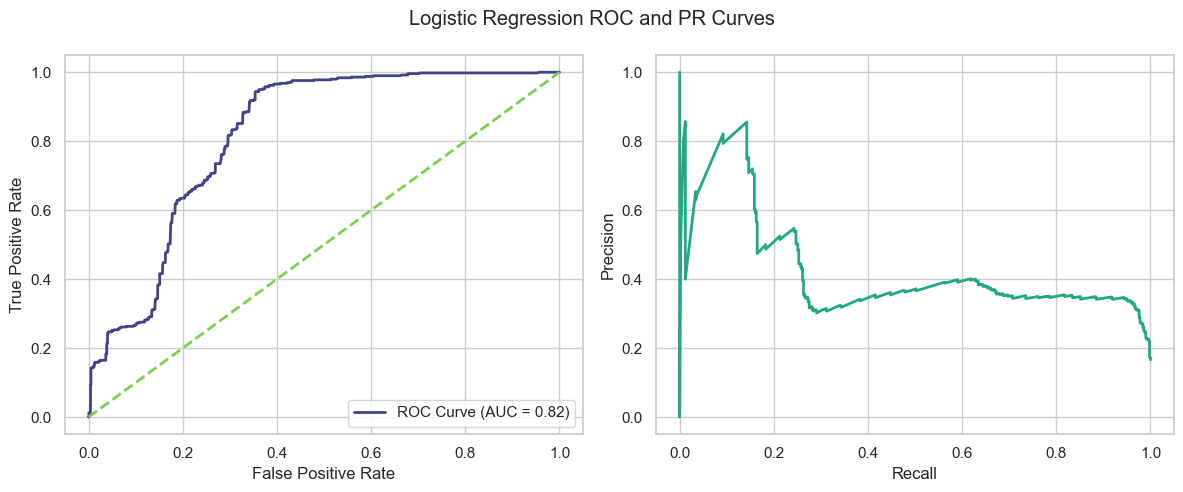

In [57]:
# Plot ROC and precision-recall curves
colors = sns.color_palette("viridis", n_colors=4)

fpr, tpr, _ = roc_curve(y_test, y_probs_lr)    # false positive rate, true positive rate, and others
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_probs_lr)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color=colors[0], lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color=colors[3], lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color=colors[2], lw=2, label=f"PR Curve (AUC = {pr_auc_scores[-1]:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.suptitle("Logistic Regression ROC and PR Curves")
plt.tight_layout()
plt.show()

**Interpretation**

The ROC AUC is not too bad, but the AUC-PR is significantly worse than a random guess (AUC-PR < 0.5). I assume that this is not due to incorrect labelling of the samples. Rather, it is either due to an imbalanced dataset or (more likely) the fact that a logistic regressor is not an appropriate classifier for this dataset.

### Save results

The decision threshold at which the model's F1 score is maximised is, roughly, at 0.2. I save this to a results DataFrame to compare to other models' performance.

In [58]:
results = df_lr_scores.iloc[1:2]
results

model  accuracy  precision    recall        f1   roc_auc  \
1  Logistic Regression 0.2   0.77018   0.384801  0.640562  0.480784  0.718281   

     pr_auc  
1  0.306195

### Interpret Results

#### A. Linearity Assumption Not Met

The p-value is significantly low (<<0.05), and therefore shows a statistically significant  statistically significant. This means that the linearity assumption is not met. It may be useful to interpret the coefficients nonetheless and then see how well naive Bayes and tree-based models fare.

#### B. Evaluation Metrics

Given that the aim of the model is to predict, and thus decrease, employee turnover, we want a model that can both capture as many true positives as possible (high recall) and minimise the number of false positives (high precision). Thus, F1 is an ideal metric to evaluate a model for this purpose. Between recall and precision, recall is more important given that the cost of expending resources attempting to retain employees who would not leave is somewhat accceptable given that employees who would have otherwise left are also targeted.

At a decision threshold of 0.2, the logistic regression model achieves the highest F1 score of 48%.

Despite the statistically significant relationship between the log-odds of y=1 and the most important continuous feature that cannot be explained by a linear relationship, there are still decent metrics for a starting model, especially when weighted by the dataset's class imbalance. The weighted recall score of 83% is quite good, although the raw recall is lower at 64%. This may be adequate or not depending on the retention strategy's goal. If 64% of employees who would turnover can be targeted with a 50% efficacy, this would increase retention by about 32% which is not insignificant.

The ROC AUC is somewhat weak at 0.718, but the AUC-PR is at a very poor 0.306 (worse than a random guess). One reason for this could be that the dataset is imbalanced with a 17% - 83% split in target classes. However, this is not an extreme imbalance, and so a more plausible interpretation of the poor AUC-PR is that a logistic regression model is not a suitable classification method for this dataset.

Besides how effective the model is at predicting turnover, it has identified satisfaction level as the most significant predictor. Perhaps there is a specific cause underlying dissatisfaction that can explain why certain dissatisfied employees leave while others remain. Another survey could be conducted that teases out specific areas of (dis)satisfaction to possibly improve the model, or another feature could be included that connects dissatisfaction to other features like time at company. (Perhaps disatisfaction over a longer period predicts turnover, or if an employee has put up with disatisfaction for a few years they may be more willing to continue at the company rather than leave and so dissatisfaction in employees at the company for a shorter time may be a better predictor.)

#### C. Interpretation of Coefficients

For each 1 unit increase in the log-odds of an employee leaving, each feature changes by the above amount holding all other features constant. So, for example, a 0.5095 increase in an employees "stagnation" will result in the log-odds of that employee leaving the company by 1, holding satisfaction, monthly hours, etc, constant.

### Takeaways

1. At a 50% decision thrshold, the recall score is 25%, weighted recall score is 84%
2. At a decision threshold of 0.2, recall is 0.64 and F1 is 0.48
3. The most important features, in order, were `satisfaction_level`, `promotion_last_5_years`, `salary_level`, `stagnation`, and `years_at_company` 
4. The linearity assumption was failed
5. The ROC AUC is 0.82 but the AUC-PR is extremely low at 0.18; although balancing the dataset may improvie this score, it is likely that a logistic regressor is not an appropriate classifier for this dataset
4. Additional features could be extracted based on satisfaction and other features (e.g., years at company, salary, or a combination of evaluation + monthly hours)
5. It is unlikely that even a refined logistic regression model will be suitable for this dataset.

## Naive Bayes

A naive Bayes model will be tested next. Although the assumptions of naive Bayes models are seldom met, they consistenly prove to be simple and powerful predictive models.

Based on the logistic regression results and interpretation, further features will be extracted from the data set before testing this model.


### Feature Engineering

Additional features will be extracted:

1. `endures`: If employee has low satisfaction and worked at company for more than 1 year
2. `unrecognised`: Low evaluation and high monthly hours
3. `under_compensated`: High hours and low salary

In [59]:
# Copy the DataFrame for the naive Bayes model
df_nb = df_logreg_encoded.copy()

# Engineer `endures` values for new feature

# Calculate mean satsifaction and assign to a variable
mean_satisfaction = df_nb["satisfaction_level"].mean()

# Define a function to apply the conditions for endurance
def endures_conditions(row):
    if row["years_at_company"] > 1:
        if row["satisfaction_level"] < mean_satisfaction:
            return 1
        else:
            return 0
    else:
        return 0

# Apply the endures_conditions function to create a new "endures" column
df_nb["endures"] = df_nb.apply(endures_conditions, axis=1)
df_nb.head(2)

satisfaction_level  last_evaluation  number_of_projects  years_at_company  \
0                0.38             0.53                   2               3.0   
1                0.80             0.86                   5               5.5   

   work_accident  left  promotion_last_5_years  stagnation  low_turnover_dept  \
0              0     1                       0           0                  0   
1              0     1                       0           1                  0   

   salary_level  work_level  endures  
0             0           0        1  
1             1           3        0

In [60]:
# Engineer `unrecognised` where an employee has low evaluation and high monthly hours

average_eval = df_nb["last_evaluation"].mean()

# Define a function to apply the conditions for unrecognised
def unrecognised_conditions(row):
    if row["last_evaluation"] < average_eval:
        if row["work_level"] in [2, 3]:
            return 1
        else:
            return 0
    else:
        return 0
    
# Apply the unrecognised_conditions function to create a new "unrecognised" column
df_nb["unrecognised"] = df_nb.apply(unrecognised_conditions, axis=1)
df_nb.head(2)

satisfaction_level  last_evaluation  number_of_projects  years_at_company  \
0                0.38             0.53                   2               3.0   
1                0.80             0.86                   5               5.5   

   work_accident  left  promotion_last_5_years  stagnation  low_turnover_dept  \
0              0     1                       0           0                  0   
1              0     1                       0           1                  0   

   salary_level  work_level  endures  unrecognised  
0             0           0        1             0  
1             1           3        0             0

In [61]:
# Engineer `under_compensated` where an employee has low salary and high monthly hours

# Define a function to apply the conditions for under_compensated
def under_compensated_conditions(row):
    if row["salary_level"] < 2:
        if row["work_level"] in [2, 3]:
            return 1
        else:
            return 0
    else:
        return 0
    
# Apply the unrecognised_conditions function to create a new "unrecognised" column
df_nb["under_compensated"] = df_nb.apply(under_compensated_conditions, axis=1)
df_nb.head(2)

satisfaction_level  last_evaluation  number_of_projects  years_at_company  \
0                0.38             0.53                   2               3.0   
1                0.80             0.86                   5               5.5   

   work_accident  left  promotion_last_5_years  stagnation  low_turnover_dept  \
0              0     1                       0           0                  0   
1              0     1                       0           1                  0   

   salary_level  work_level  endures  unrecognised  under_compensated  
0             0           0        1             0                  0  
1             1           3        0             0                  1

### Model Building

Given the binary target variable and the binary and the fact that most predictor variables are binary, a Bernoulli naive Bayes is a good option. I'll also test out the Gaussian naive Bayes for comparison.

In [62]:
# Subset the data and split into test and training

# Target
y = df_nb["left"]

# For predictors I'll use the top features from the logistic regression model as well as the three new features
nb_features = ["satisfaction_level",
               "years_at_company",
               "promotion_last_5_years",
               "stagnation",
               "salary_level", 
               "endures",
               "unrecognised",
               "under_compensated"
              ]

X = df_nb[nb_features]

# Split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11, test_size=0.25)

In [63]:
# Instantiate and fit Bernoulli model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Get the predictions on test data
y_pred_bnb = bnb.predict(X_test)

#Get performance metrics
print("Bernoulli Naive Bayes Performance Metrics:")
print("Accuracy:", "%.3f" % accuracy_score(y_test, y_pred_bnb))
print("Precision:", "%.3f" % precision_score(y_test, y_pred_bnb))
print("Recall:", "%.3f" % recall_score(y_test, y_pred_bnb))
print("F1 Score:", "%.3f" % f1_score(y_test, y_pred_bnb))

Bernoulli Naive Bayes Performance Metrics:
Accuracy: 0.836
Precision: 0.521
Recall: 0.147
F1 Score: 0.229


In [64]:
# Instantiate and fit Gaussian model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_pred_gnb = gnb.predict(X_test)

# Get performance metrics
print("Gaussian Naive Bayes Performance Metrics:")
print("Accuracy:", "%.3f" % accuracy_score(y_test, y_pred_gnb))
print("Precision:", "%.3f" % precision_score(y_test, y_pred_gnb))
print("Recall:", "%.3f" % recall_score(y_test, y_pred_gnb))
print("F1 Score:", "%.3f" % f1_score(y_test, y_pred_gnb))

Gaussian Naive Bayes Performance Metrics:
Accuracy: 0.791
Precision: 0.428
Recall: 0.773
F1 Score: 0.551


Surprisingly, the Gaussian naive Bayes model performed much better on recall and F1 scores. 

**I'll now scale the features and compare performance.**

In [65]:
# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

In [66]:
# Instantiate and fit Bernoulli model on scaled training data
bnb2 = BernoulliNB()
bnb2.fit(X_train_scaled, y_train)

# Get the predictions on scaled test data
y_pred_bnb2 = bnb.predict(X_test_scaled)

# Get performance metrics
print("Bernoulli Naive Bayes Performance Metrics on Scaled Data:")
print("Accuracy:", "%.3f" % accuracy_score(y_test, y_pred_bnb2))
print("Precision:", "%.3f" % precision_score(y_test, y_pred_bnb2))
print("Recall:", "%.3f" % recall_score(y_test, y_pred_bnb2))
print("F1 Score:", "%.3f" % f1_score(y_test, y_pred_bnb2))



Bernoulli Naive Bayes Performance Metrics on Scaled Data:
Accuracy: 0.800
Precision: 0.314
Recall: 0.171
F1 Score: 0.221


C:\Users\David Scholtz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names


In [67]:
# Instantiate and fit Gaussian model on scaled training data
gnb2 = GaussianNB()
gnb2.fit(X_train_scaled, y_train)

# Get the predictions on scaled test data
y_pred_gnb2 = gnb.predict(X_test_scaled)

# Get performance metrics
print("Gaussian Naive Bayes Performance Metrics on Scaled Data:")
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_pred_gnb2))
print('Precision:', '%.3f' % precision_score(y_test, y_pred_gnb2))
print('Recall:', '%.3f' % recall_score(y_test, y_pred_gnb2))
print('F1 Score:', '%.3f' % f1_score(y_test, y_pred_gnb2))

Gaussian Naive Bayes Performance Metrics on Scaled Data:
Accuracy: 0.838
Precision: 0.524
Recall: 0.245
F1 Score: 0.334


C:\Users\David Scholtz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names


Both models performed worse on the scaled data except on precision for the Gaussian and recall for the Bernoulli.


### Evaluation

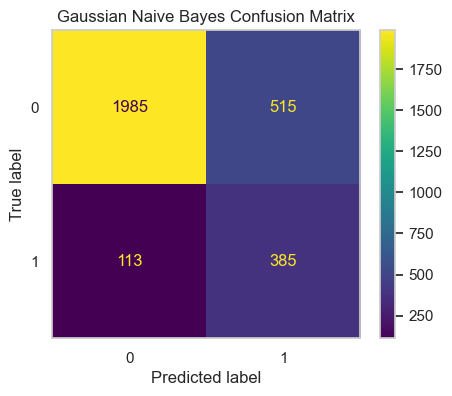

In [68]:
# Construct and plot confusion matrix of Gaussian NB model
cm = confusion_matrix(y_test, y_pred_gnb, labels=gnb.classes_)

# Create the display for a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

# Plot
disp.plot(values_format='')
plt.grid(False)
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

### Decision Thresholds and ROC and PR Curves 

In [69]:
# Get predicted probabilities for left=1
y_probs_gnb = gnb.predict_proba(X_test)[:, 1]

# Define a range of thresholds
thresholds_gnb = [0.1, 0.2, 0.25, 0.35, 0.3, 0.4, 0.5, 0.6, 0.7]

# Initialize lists to store metric values
accuracy_scores_gnb = []
precision_scores_gnb = []
recall_scores_gnb = []
f1_scores_gnb = []
roc_auc_scores_gnb = []
pr_auc_scores_gnb = []

for threshold in thresholds_gnb:
    y_pred_threshold_gnb = (y_probs_gnb >= threshold).astype(int)
    accuracy_scores_gnb.append(accuracy_score(y_test, y_pred_threshold_gnb))
    precision_scores_gnb.append(precision_score(y_test, y_pred_threshold_gnb))
    recall_scores_gnb.append(recall_score(y_test, y_pred_threshold_gnb))
    f1_scores_gnb.append(f1_score(y_test, y_pred_threshold_gnb))
    roc_auc_scores_gnb.append(roc_auc_score(y_test, y_pred_threshold_gnb))
    pr_auc_scores_gnb.append(average_precision_score(y_test, y_pred_threshold_gnb))

columns = ["model", "accuracy", "precision", "recall", "f1", "roc_auc", "pr_auc"]
model_gnb = ["Gaussian Bayes 0.1",
             "Gaussian Bayes 0.2",
             "Gaussian Bayes 0.25",
             "Gaussian Bayes 0.3",
             "Gaussian Bayes 0.35",
             "Gaussian Bayes 0.4",
             "Gaussian Bayes 0.5",
             "Gaussian Bayes 0.6",
             "Gaussian Bayes 0.7"]

# Create a dictionary with column names as keys and corresponding values as lists of model and evaluation scores
gnb_threshold_scores = {
    columns[0]: model_gnb,
    columns[1]: accuracy_scores_gnb,
    columns[2]: precision_scores_gnb,
    columns[3]: recall_scores_gnb,
    columns[4]: f1_scores_gnb,
    columns[5]: roc_auc_scores_gnb,
    columns[6]: pr_auc_scores_gnb
}

# Create the DataFrame
df_gnb_scores = pd.DataFrame(gnb_threshold_scores)

df_gnb_scores

model  accuracy  precision    recall        f1   roc_auc  \
0   Gaussian Bayes 0.1  0.561041   0.270997  0.971888  0.423818  0.725544   
1   Gaussian Bayes 0.2  0.657105   0.321909  0.961847  0.482377  0.779124   
2  Gaussian Bayes 0.25  0.707138   0.357357  0.955823  0.520219  0.806712   
3   Gaussian Bayes 0.3  0.769847   0.416084  0.955823  0.579781  0.844312   
4  Gaussian Bayes 0.35  0.739159   0.385113  0.955823  0.549020  0.825912   
5   Gaussian Bayes 0.4  0.785857   0.432203  0.921687  0.588462  0.840243   
6   Gaussian Bayes 0.5  0.790527   0.427778  0.773092  0.550787  0.783546   
7   Gaussian Bayes 0.6  0.779520   0.384724  0.546185  0.451452  0.686092   
8   Gaussian Bayes 0.7  0.772515   0.324427  0.341365  0.332681  0.599883   

     pr_auc  
0  0.268048  
1  0.315965  
2  0.348909  
3  0.405041  
4  0.375438  
5  0.411365  
6  0.368404  
7  0.285514  
8  0.220155

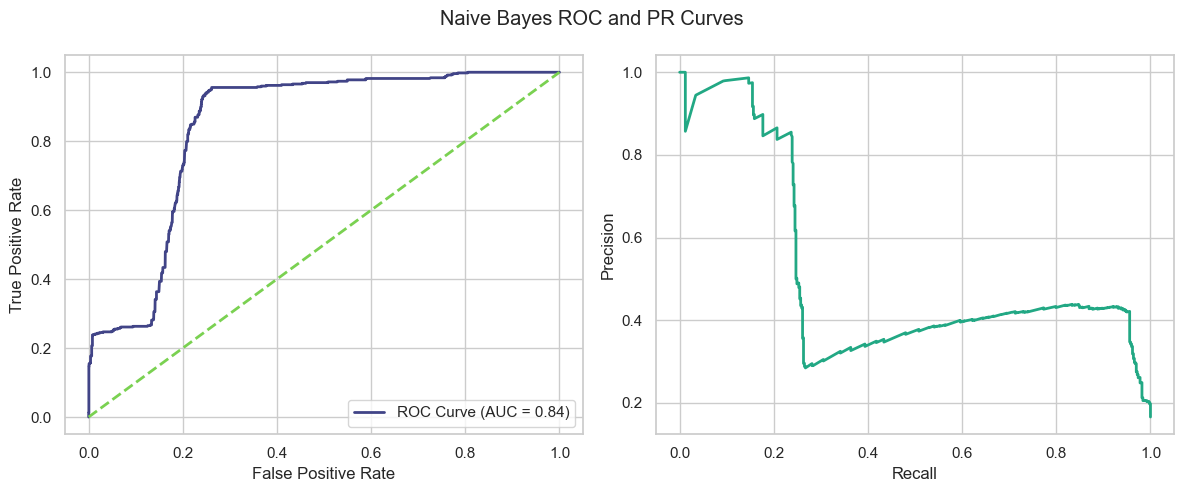

In [70]:
# Plot ROC and precision-recall curves
colors = sns.color_palette("viridis", n_colors=4)

fpr, tpr, _ = roc_curve(y_test, y_probs_gnb)    # false positive rate, true positive rate, and others
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_probs_gnb)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color=colors[0], lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color=colors[3], lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color=colors[2], lw=2, label=f"PR Curve (AUC = {pr_auc_scores[-1]:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.suptitle("Naive Bayes ROC and PR Curves")
plt.tight_layout()
plt.show()

**Interpretation**

The ROC AUC is about 12 percentage points better than the logistic regressor. The PR curve is also better, but still worse than a random guess. While better than the logistic regressor, this Bayes model basically requires that we choose between higher recall or precision.

### Save Results


The optimal F1 score for the naive Bayes model lies at a decision threshold of around 0.4. This model is saved for comparison with other models. 

In [71]:
# Save naive Bayes model results to a DataFrame
df_gnb_results = df_gnb_scores.iloc[5:6]

# Add to `results` DataFrame for comparison with other models
results = pd.concat([results, df_gnb_results], ignore_index=True)
results

model  accuracy  precision    recall        f1   roc_auc  \
0  Logistic Regression 0.2  0.770180   0.384801  0.640562  0.480784  0.718281   
1       Gaussian Bayes 0.4  0.785857   0.432203  0.921687  0.588462  0.840243   

     pr_auc  
0  0.306195  
1  0.411365

### Feature Importance

One way to determine feature importance from a naive Bayes model is to calculate the mean value of a feature for each class. This can tell us both (i) how much of a difference there is in a feature between the two classes, and thus how important that feature is to classify and predict responses, and (ii) how the proportional difference of a feature compares to that of other features, and thus which features are relatively more important (or less important) than others in the model.

In [72]:
# Access feature means (thetas) for each class (0 and 1) of "left"
feature_means_gnb = gnb.theta_

# List of feature names
feature_names_nb = nb_features

# Create a DataFrame to compare means for each feature by class
df_gnb_means = pd.DataFrame(feature_means_gnb, columns=feature_names_nb, index=["left=0", "left=1"])

df_gnb_means

satisfaction_level  years_at_company  promotion_last_5_years  \
left=0            0.669821          3.154667                0.020400   
left=1            0.439337          3.852646                0.005358   

        stagnation  salary_level   endures  unrecognised  under_compensated  
left=0    0.309200      0.636933  0.390800      0.224267           0.435867  
left=1    0.525787      0.426658  0.725385      0.031480           0.535164

In [73]:
# Examine absolute and relative (proportional) differences in means:

# Instantiate lists of absolute and relative differences
absolute_diff = []
relative_diff = []

for feature in feature_names_nb:
    lowest = df_gnb_means[feature].min()
    highest = df_gnb_means[feature].max()
    abs_diff = highest - lowest
    absolute_diff.append(abs_diff)
    rel_diff = abs_diff/lowest
    relative_diff.append(rel_diff)

# Convert the lists to DataFrame objects with the same column names as df_gnb_means
df_absolute_diff = pd.DataFrame([absolute_diff], columns=feature_names_nb, index=["abs_diff"])
df_relative_diff = pd.DataFrame([relative_diff], columns=feature_names_nb, index=["rel_diff"])

# Concatenate absolute and relative differences with means
df_gnb_fimportance = pd.concat([df_gnb_means, df_absolute_diff, df_relative_diff], ignore_index=False)

df_gnb_fimportance

satisfaction_level  years_at_company  promotion_last_5_years  \
left=0              0.669821          3.154667                0.020400   
left=1              0.439337          3.852646                0.005358   
abs_diff            0.230484          0.697979                0.015042   
rel_diff            0.524619          0.221253                2.807150   

          stagnation  salary_level   endures  unrecognised  under_compensated  
left=0      0.309200      0.636933  0.390800      0.224267           0.435867  
left=1      0.525787      0.426658  0.725385      0.031480           0.535164  
abs_diff    0.216587      0.210276  0.334585      0.192786           0.099297  
rel_diff    0.700475      0.492844  0.856154      6.124045           0.227816

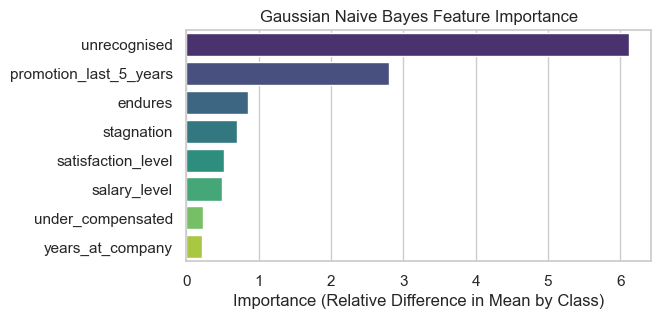

In [74]:
# Visualise feature importance based on relative difference in feature mean between classes

# Subset row for plotting, pass into DF function, and sort the values and transpose (.T) vertical array into row
gnb_importance = df_gnb_fimportance.loc["rel_diff", :]
df_gnb_importance = pd.DataFrame(gnb_importance)
df_gnb_importance_sorted = df_gnb_importance.sort_values(by="rel_diff", ascending=False).T

# Plot features' relative differences as a bar plot
plt.figure(figsize=(6, 3))
sns.barplot(data=df_gnb_importance_sorted, orient="h", palette="viridis")
plt.xlabel("Importance (Relative Difference in Mean by Class)")
plt.title("Gaussian Naive Bayes Feature Importance")
plt.show()

### Interpret Results

#### A. Assumptions

Naive Bayes models often don't have assumptions met, as was the case here. Given that the majority of features used are categorical it was expected that a Bernoulli model would perform better compared to a Gaussian (which prefers continuous features). Surprisingly, the Gaussian model had better metrics across the board.

This reinforces the strong reputation that naive Bayes models have of performing well even with datasets that don't meet their assumptions.

#### B. Evaluation Metrics

Recall that an effective model for predicting and preventing employee turnover is one that has high recall and precision; it predicts many employees who would leave without predicting too many employees who would not leave. Thus, a high F1 score is the aim.

The Gaussian's decision threshold at 0.4 yielded the strongest evaluation metrics given the business problem of reducing employee turnover, and it outperformed the logistic regressor on every metric. An impressive recall score of 92% was achieved, but precision still sits at 43%. A classifier that is able to accurately predict as great a proportion of positives while avoiding so many mistaken positives would be even better than what this model achieves.

ROC AUC is at a more comfortable level of 84%, but the precision-recall tradeoff is still weak (41%). A naive Bayes model is evidently a better fit for this data than a logistic regressor.

#### C. Feature *thetas* for Classes

Newly engineered features "unrecognised", "endures", and "stagnation" were included in this model. Thus, this model cannot be directly compared to the logistic regression model. All three new features showed up in the four most important; a lack of promotion was the only non-extracted important feature.

Contrary to the previous model, "satisfaction_level" did not feature as strongly in predicting turnover.

Extremely surprising is the fact that "unrecognised" is *inversely* related to turnover! This unituitively indicates that the combination of working hard and having a low evaluation increases an employee's chance of not leaving. It's not clear what to make of this and would need to be clarified, ideally with someone from the fictitious company. One line of investigation within the data is to run the model again and include "work_level" and "last_evaluation"

`stagnation` was included with the expectation that it would be more important than `promotion_last_5_years`, but it turned out not to be as important as expected.

### Takeaways

1. With an F1 score of 48% the Gaussian naive Bayes model performed better than the logistic regression model, and, surprisingly, a Bernoulli naive Bayes
2. This model is not directly comparable to the logistic regression due to the difference in features available to each
3. Employee `satisfaction_level` is not as important here as the logistic regressor; rather, a low `last_evaluation` in conjunction with high `work_level` is predictive, although inversely to what one would expect
4. Newly extracted features accounted for three of the four most important features, but `unrecognised` might be investigated further
5. A better model than the one developed here would be able to decrease its rate of false positive predictions

***

## Decision Tree Model

The next model to be tested is a single decision tree.

1. Feature engineering
2. Model building
3. Evaluation metrics
4. Save results
5. Feature importance
6. Interpret results
7. Summarise key takeaways


### Feature Engineering

The encoded DataFrame with all extracted features will be used.

In [75]:
# Copy DataFrame for decision tree model
df_dtree = df_nb.copy()

df_dtree.head()

satisfaction_level  last_evaluation  number_of_projects  years_at_company  \
0                0.38             0.53                   2               3.0   
1                0.80             0.86                   5               5.5   
2                0.11             0.88                   7               4.0   
3                0.72             0.87                   5               5.0   
4                0.37             0.52                   2               3.0   

   work_accident  left  promotion_last_5_years  stagnation  low_turnover_dept  \
0              0     1                       0           0                  0   
1              0     1                       0           1                  0   
2              0     1                       0           1                  0   
3              0     1                       0           1                  0   
4              0     1                       0           0                  0   

   salary_level  work_level  endures  unrecognised  under_compensated  
0             0           0        1             0                  0  
1             1           3        0             0                  1  
2             1           3        1             0                  1  
3             0           2        0             0                  1  
4             0           1        1             0                  0

### Model Building

1. Subset data into target and predictors and split into training, validation, and testing sets
2. GridSearch to tune hyperparameters by cross validation
3. Validate on separate validation dataset
4. Fit champion decision tree model on full training set using best hyperparameters

In [76]:
# Subset target and predictor datasets
y_dt = df_dtree["left"]
X_dt = df_dtree.drop(["work_accident", "left"], axis=1)

# Split into training and test sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt,
                                                                y_dt,
                                                                test_size=0.2,
                                                                stratify=y_dt,
                                                                random_state=11)

# Split X_train into training and validation sets
X_tr_dt, X_val_dt, y_tr_dt, y_val_dt = train_test_split(X_train_dt,
                                                        y_train_dt,
                                                        test_size=0.25,
                                                        stratify=y_train_dt,
                                                        random_state=11)

In [77]:
# Validate that the splits are as expected for a dataset of 11991 observations
print(f"X_tr_dt: {X_tr_dt.shape[0]}\ny_tr_dt: {y_tr_dt.shape[0]}\n\nX_val_dt: {X_val_dt.shape[0]}\ny_val_dt: {y_val_dt.shape[0]}")

X_tr_dt: 7194
y_tr_dt: 7194

X_val_dt: 2398
y_val_dt: 2398


In [78]:
X_test_dt.shape[0]

2399

In [79]:
y_test_dt.shape[0]

2399

In [80]:
%%time

# Assign hyperparameter grid and scoring metrics to variables
dt_param_grid ={
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 7, 9, 10, 15],
    "min_samples_split": [5, 10, 20, 28, 30, 32, 34, 40, 50],
    "min_samples_leaf": [1, 2, 3, 5, 7, 10, 20],
    "class_weight": [None, "balanced"]
}    # NOTE: Hyperparameter grid values were tested several times with a variety of combinations of values

dt_scoring = ["accuracy", "precision", "recall", "f1"]

dtree1 = DecisionTreeClassifier(random_state=11)

# Instantiate a GridSearch
dtree_cv = GridSearchCV(dtree1,
                        dt_param_grid,
                        scoring=dt_scoring,
                        cv=5,
                        refit="f1",
                        n_jobs=-1
                       )

# Fit GridSearch to training dataset
dtree_cv.fit(X_tr_dt, y_tr_dt)

CPU times: total: 4.42 s
Wall time: 21 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 9, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 5, 7, 10, 20],
                         'min_samples_split': [5, 10, 20, 28, 30, 32, 34, 40,
                                               50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [81]:
# Get result of best decision tree estimator from GridSearch
dtree_cv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=30, random_state=11)

In [82]:
# Show hyperparameters of best CV model
best_params_cv = dtree_cv.best_params_
best_params_cv

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 30}

In [83]:
%%time

# Now look for best model using the separate validation set. If this matches the best CV model, we have a champion.

# Instantiate a decision tree classifier
dtree2 = DecisionTreeClassifier(random_state=11)

# Create a list of split indices from the separate validation set
split_index_dt = [0 if x in X_val_dt.index else -1 for x in X_train_dt.index]

# Assign PredefinedSplit index to a variable
custom_split_dt = PredefinedSplit(split_index_dt)

# Instantiate validation GridSearch
dtree_val = GridSearchCV(dtree2,
                         dt_param_grid,
                         scoring=dt_scoring,
                         cv=custom_split_dt,
                         refit="f1",
                         n_jobs=-1
                        )

# Fit GridSearch to data
dtree_val.fit(X_train_dt, y_train_dt)

CPU times: total: 1.11 s
Wall time: 4.46 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ...,  0, -1])),
             estimator=DecisionTreeClassifier(random_state=11), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 9, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 5, 7, 10, 20],
                         'min_samples_split': [5, 10, 20, 28, 30, 32, 34, 40,
                                               50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [84]:
# Get result of best decision tree estimator from separate validation set
dtree_val.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=32, random_state=11)

In [85]:
# Show hyperparameters of best validation model
best_params_val = dtree_val.best_params_
best_params_val

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 32}

In [86]:
# Hyperparameters are different for each model
# The model with the highest refit score (F1) will be chosen as the optimal model

print(f"Cross Validated F1 Score: {dtree_cv.best_score_}\nSeparate Validation F1 Score: {dtree_val.best_score_}")

Cross Validated F1 Score: 0.941672456658989
Separate Validation F1 Score: 0.9395109395109394


In [87]:
# The best estimator from the CV decision tree models has a marginally higher F1 score at 94%
# The CV model will be fit using the optimal hyperparameters to the whole training dataset before evaluation

# Instantiate decision tree classifier with optimal hyperparameters
dtree_opt = DecisionTreeClassifier(random_state=11,
                                   class_weight=None,
                                   criterion="gini",
                                   max_depth=7,
                                   min_samples_leaf=1,
                                   min_samples_split=32)

# Fit to training dataset
dtree_opt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=7, min_samples_split=32, random_state=11)

### Evaluation Metrics

In [88]:
# Get predicted values
y_pred_dt = dtree_opt.predict(X_test_dt)

# Get performance metrics
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
precision_dt = precision_score(y_test_dt, y_pred_dt)
recall_dt = recall_score(y_test_dt, y_pred_dt)
f1_dt = f1_score(y_test_dt, y_pred_dt)

# Print results
print("Decision Tree Classifier Performance Metrics:")
print('Accuracy:', '%.3f' % accuracy_dt)
print('Precision:', '%.3f' % precision_dt)
print('Recall:', '%.3f' % recall_dt)
print('F1 Score:', '%.3f' % f1_dt)

Decision Tree Classifier Performance Metrics:
Accuracy: 0.982
Precision: 0.968
Recall: 0.925
F1 Score: 0.946


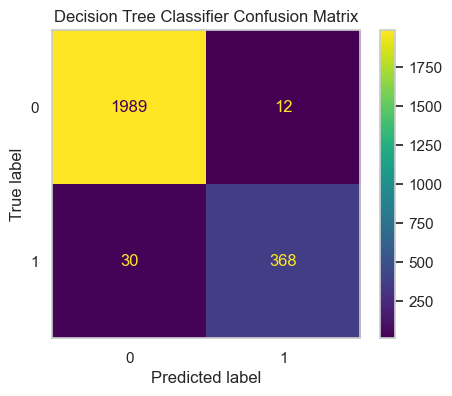

In [89]:
# Construct and plot confusion matrix of decision tree classifier
cm = confusion_matrix(y_test_dt, y_pred_dt, labels=dtree_opt.classes_)

# Create the display for a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree_opt.classes_)

# Plot
disp.plot(values_format='')
plt.grid(False)
plt.title("Decision Tree Classifier Confusion Matrix")
plt.show()

### Decision Thresholds and ROC and PR Curves 

In [90]:
# Get predicted probabilities
y_prob_dt = dtree_opt.predict_proba(X_test_dt)[:, 1]

# Define a range of thresholds
thresholds_dt = [0.1, 0.2, 0.25, 0.35, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Initialize lists to store metric values
accuracy_scores_dt = []
precision_scores_dt = []
recall_scores_dt = []
f1_scores_dt = []
roc_auc_scores_dt = []
pr_auc_scores_dt = []

for threshold in thresholds_dt:
    y_pred_threshold_dt = (y_prob_dt >= threshold).astype(int)
    accuracy_scores_dt.append(accuracy_score(y_test_dt, y_pred_threshold_dt))
    precision_scores_dt.append(precision_score(y_test_dt, y_pred_threshold_dt))
    recall_scores_dt.append(recall_score(y_test_dt, y_pred_threshold_dt))
    f1_scores_dt.append(f1_score(y_test_dt, y_pred_threshold_dt))
    roc_auc_scores_dt.append(roc_auc_score(y_test_dt, y_pred_threshold_dt))
    pr_auc_scores_dt.append(average_precision_score(y_test_dt, y_pred_threshold_dt))

columns = ["model", "accuracy", "precision", "recall", "f1", "roc_auc", "pr_auc"]
model_dt = ["Decision Tree 0.1",
            "Decision Tree 0.2",
            "Decision Tree 0.25",
            "Decision Tree 0.3",
            "Decision Tree 0.35",
            "Decision Tree 0.4",
            "Decision Tree 0.5",
            "Decision Tree 0.6",
            "Decision Tree 0.7",
            "Decision Tree 0.8",
           ]

# Create a dictionary with column names as keys and corresponding values as lists of model and evaluation scores
dt_threshold_scores = {
    columns[0]: model_dt,
    columns[1]: accuracy_scores_dt,
    columns[2]: precision_scores_dt,
    columns[3]: recall_scores_dt,
    columns[4]: f1_scores_dt,
    columns[5]: roc_auc_scores_dt,
    columns[6]: pr_auc_scores_dt
}

# Create the DataFrame
df_dt_scores = pd.DataFrame(dt_threshold_scores)

df_dt_scores

model  accuracy  precision    recall        f1   roc_auc  \
0   Decision Tree 0.1  0.967486   0.872093  0.942211  0.905797  0.957362   
1   Decision Tree 0.2  0.978741   0.932668  0.939698  0.936170  0.963103   
2  Decision Tree 0.25  0.980825   0.951282  0.932161  0.941624  0.961333   
3   Decision Tree 0.3  0.982076   0.965879  0.924623  0.944801  0.959063   
4  Decision Tree 0.35  0.981242   0.960836  0.924623  0.942382  0.958563   
5   Decision Tree 0.4  0.982076   0.965879  0.924623  0.944801  0.959063   
6   Decision Tree 0.5  0.982493   0.968421  0.924623  0.946015  0.959313   
7   Decision Tree 0.6  0.982493   0.968421  0.924623  0.946015  0.959313   
8   Decision Tree 0.7  0.982910   0.970976  0.924623  0.947233  0.959563   
9   Decision Tree 0.8  0.982910   0.970976  0.924623  0.947233  0.959563   

     pr_auc  
0  0.831283  
1  0.886431  
2  0.898003  
3  0.905580  
4  0.900916  
5  0.905580  
6  0.907930  
7  0.907930  
8  0.910292  
9  0.910292

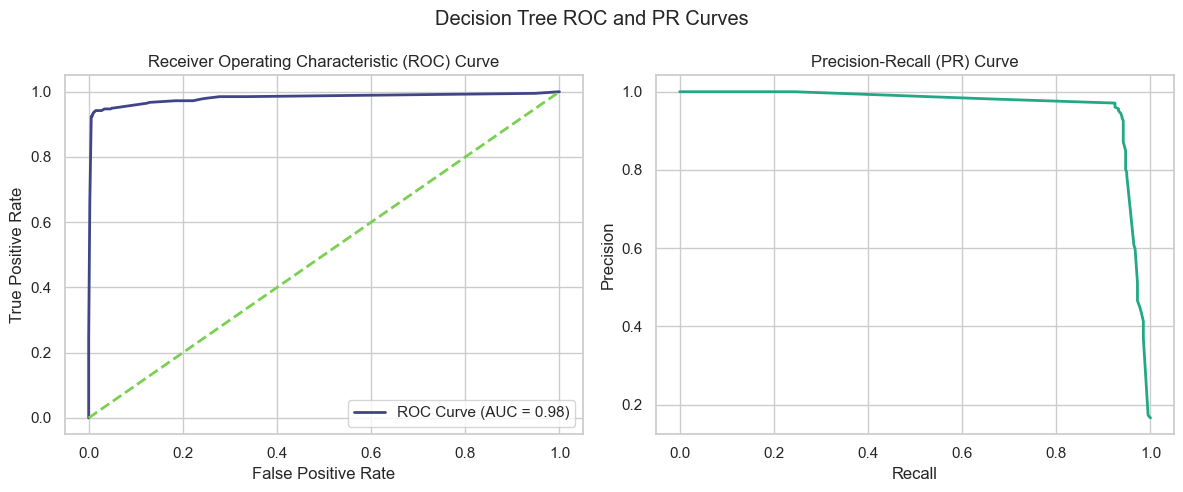

In [91]:
# Compute ROC and PR curves
colors = sns.color_palette("viridis", n_colors=4)

fpr, tpr, thresholds = roc_curve(y_test_dt, y_prob_dt)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test_dt, y_prob_dt)

# Create ROC and PR subplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color=colors[0], lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color=colors[3], lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color=colors[2], lw=2, label=f"PR Curve (AUC = {pr_auc_scores[-1]:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall (PR) Curve")

plt.suptitle("Decision Tree ROC and PR Curves")
plt.tight_layout()
plt.show()

**Interpretation**

The ROC AUC is a further 14 percentage points better than the naive Bayes model. The PR curve is signifiantly better, showing a convex shape rather than the concave shape shown for the logistic regression and naive Bayes models.

### Save Results


The optimal F1 score of 0.95 caps out around a decision threshold of 0.7-0.8. This is quite strong and would be satisfactory on its own. Moreover, a higher decision threshold means that the higher the probability of response the model assigns to an observation, the more likely it is to be true. This shows that the model is very strong.

In [92]:
# Save results to a DataFrame
df_dtree_results = df_dt_scores.iloc[8:9]

# Add to `results` DataFrame
results = pd.concat([results, df_dtree_results], ignore_index=True)
results

model  accuracy  precision    recall        f1   roc_auc  \
0  Logistic Regression 0.2  0.770180   0.384801  0.640562  0.480784  0.718281   
1       Gaussian Bayes 0.4  0.785857   0.432203  0.921687  0.588462  0.840243   
2        Decision Tree 0.7  0.982910   0.970976  0.924623  0.947233  0.959563   

     pr_auc  
0  0.306195  
1  0.411365  
2  0.910292

### Feature Importance

The feature importance will be visualised using a decision tree visualisation provided through the [dtreeviz package](https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb#scrollTo=lC6WEpJMeTxR). 

In [93]:
# Initialise dtreeviz model
feature_names_dt=X_dt.columns
viz_model = dtreeviz.model(dtree_opt,
                           X_train=X_train_dt,
                           y_train=y_train_dt,
                           target_name="left",
                           feature_names=feature_names_dt,
                           class_names=["stayed", "left"],
                          )

viridis = [
    None,  # 0 classes
    None,  # 1 class
    ['#440154', '#21918c'],  # 2 classes (viridis colors)
    ['#440154', '#fde725', '#21918c'],  # 3 classes (viridis colors)
    ['#440154', '#fde725', '#21918c', '#2c7bb6'],  # 4 classes (viridis colors)
    ['#440154', '#fde725', '#21918c', '#43a2ca', '#2c7bb6'],  # 5 classes (viridis colors)
    ['#440154', '#c7e9b4', '#43a2ca', '#2166ac', '#fde725', '#d55e00'],  # 6 classes (viridis colors)
    ['#440154', '#c7e9b4', '#84c3a3', '#43a2ca', '#2166ac', '#fde725', '#d55e00'],  # 7 classes (viridis colors)
    ['#440154', '#e0f3db', '#c7e9b4', '#84c3a3', '#197e7e', '#2166ac', '#fde725', '#d55e00'],  # 8 classes (viridis colors)
    ['#440154', '#c7e9b4', '#43a2ca', '#6baed6', '#440154', '#2171b5', '#fde725', '#d55e00', '#e31a1c'],  # 9 classes (viridis colors)
    ['#440154', '#c7e9b4', '#43a2ca', '#6baed6', '#440154', '#2171b5', '#fde725', '#d55e00', '#e31a1c', '#a50026']  # 10 classes (viridis colors)
]


colors={'classes': viridis}

C:\Users\David Scholtz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


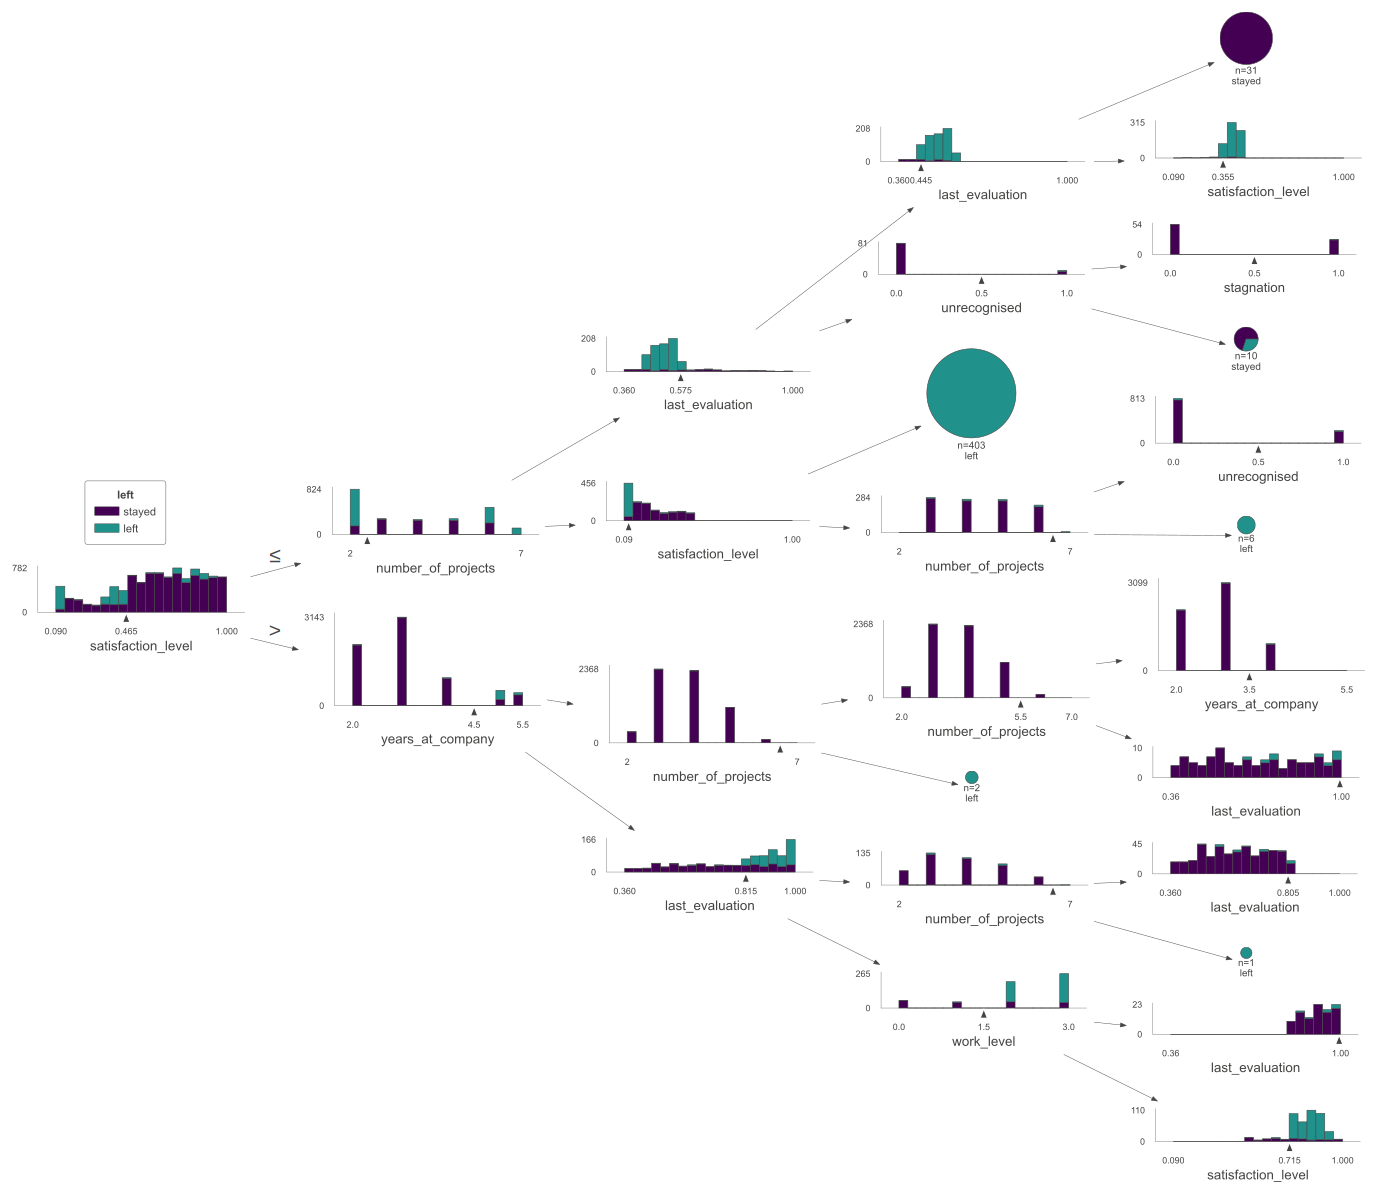

In [94]:
# Use dtreeviz to plot the first four levels of decision tree
viz_model.view(scale=1.5, depth_range_to_display=(0, 4), orientation="LR", colors=colors)

In [95]:
# # Save SVG of full tree
# v = viz_model.view(scale=1.5, colors=colors)
# v.save("dtree_left_print.svg")

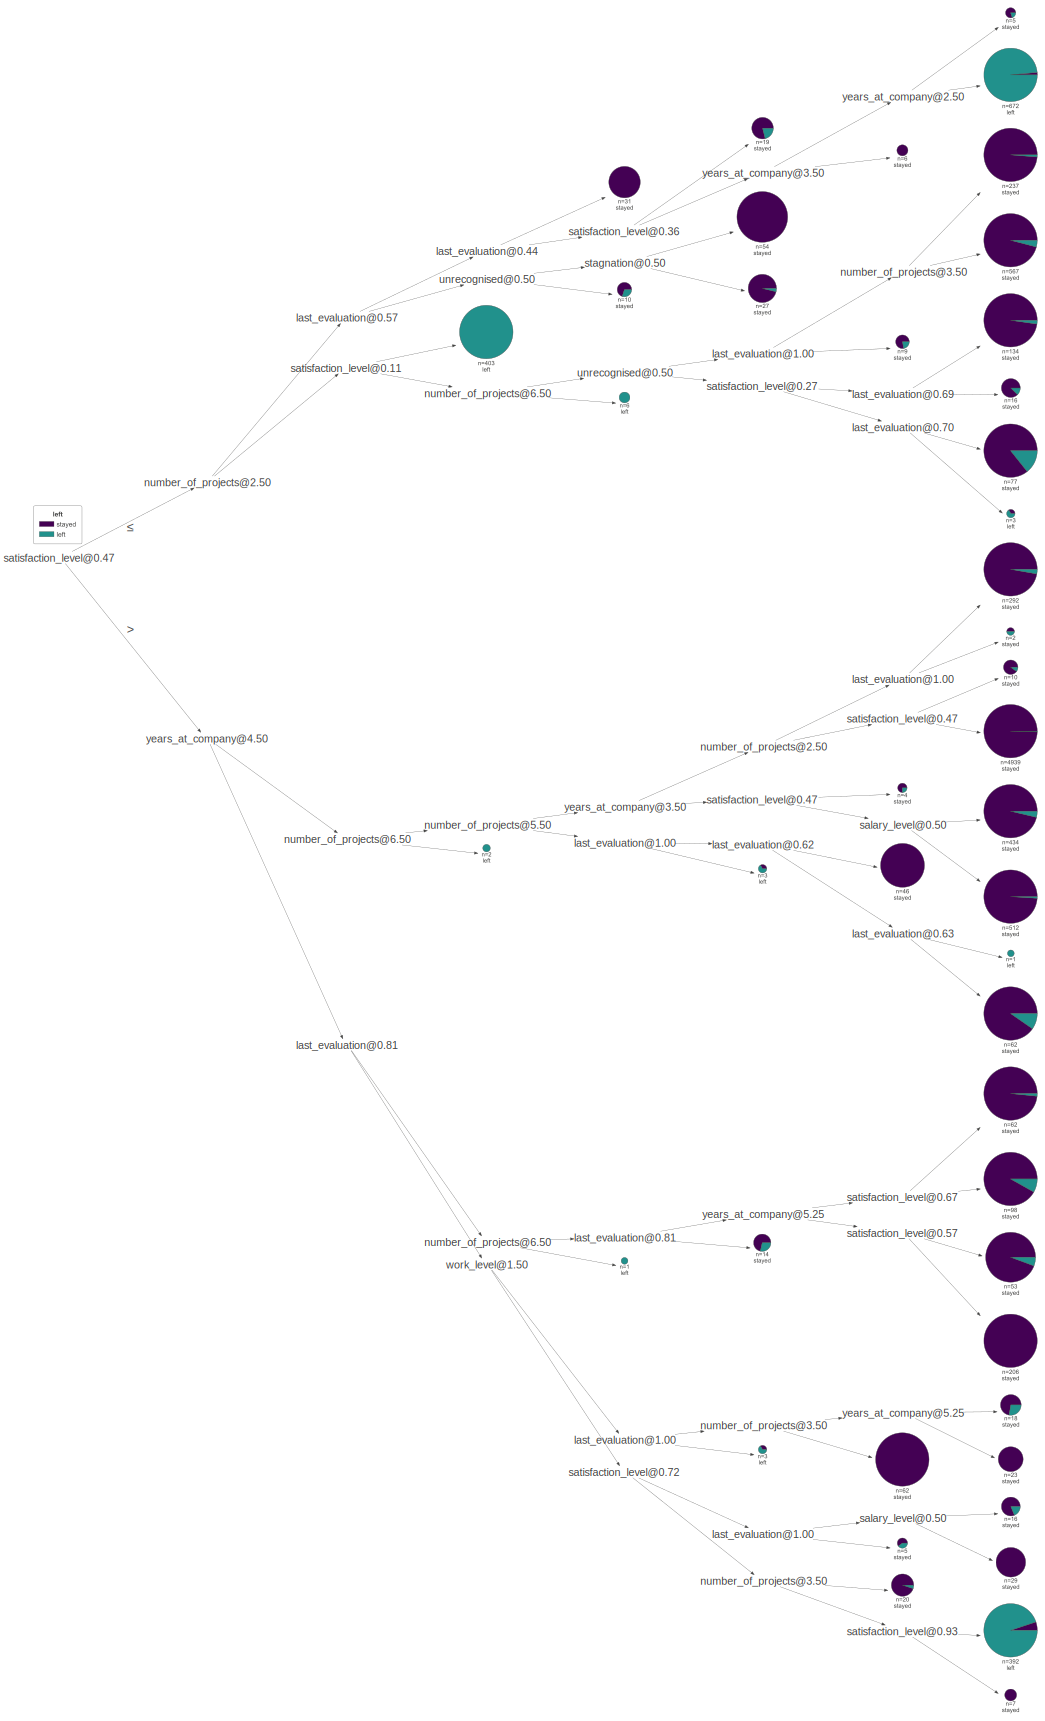

In [96]:
# Full tree at a glance
viz_model.view(scale=0.9, fancy=False, orientation="LR", colors=colors)

In [97]:
# Make a df object with feature importance scores
dt_importance = dtree_opt.feature_importances_
dt_feature_names = X_train_dt.columns

df_dt_importance = pd.DataFrame({
    "Feature": dt_feature_names,
    "Importance": dt_importance
})

df_dt_importance.set_index("Feature", inplace=True)

# Sort by descending value
df_dt_importance_sorted = df_dt_importance.sort_values(by="Importance", ascending=False)

df_dt_importance_sorted

Importance
Feature                           
satisfaction_level        0.539756
last_evaluation           0.164269
number_of_projects        0.133614
years_at_company          0.120503
work_level                0.040456
unrecognised              0.000924
salary_level              0.000457
stagnation                0.000021
promotion_last_5_years    0.000000
low_turnover_dept         0.000000
endures                   0.000000
under_compensated         0.000000

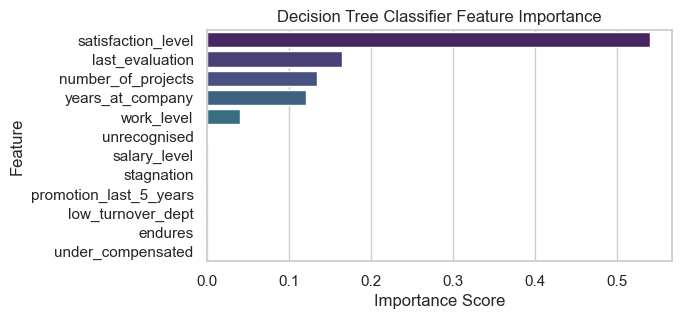

In [98]:
# Transpose and plot feature importance for decision tree classifier
df_dt_importance_t = df_dt_importance_sorted.T
plt.figure(figsize=(6, 3))
sns.barplot(data=df_dt_importance_t, orient="h", palette="viridis")
plt.xlabel("Importance Score")
plt.title("Decision Tree Classifier Feature Importance")
plt.show()

### Interpret Results

#### A. Evaluation Metrics

The performance metrics are very good, especially compared to the previous two models. A strong F1 score of 94.6% was achieved, meaning that the model does well predicting a high proportion of responses (employees who leave) while also having a low rate of false positives. Since both predicting as many responses as possible as well as not predicting false responses are valuable for an effective employee retention strategy, a high F1 score is an ideal metric to determine the suitability of a model.

The ROC AUC and the PR curve are excellent, indicating that a high performance metric in one area doesn't exclude good performance in another.

#### B. Feature Importance

Recall that the important features in the naive Bayes model were:

In [99]:
df_gnb_importance_sorted

unrecognised  promotion_last_5_years   endures  stagnation  \
rel_diff      6.124045                 2.80715  0.856154    0.700475   

          satisfaction_level  salary_level  under_compensated  \
rel_diff            0.524619      0.492844           0.227816   

          years_at_company  
rel_diff          0.221253

Given that `last_evaluation` was not important in the logistic regression model, it was excluded from the naive Bayes model training. However, given its importance here, it could have been included and likely increased the power of the NB model. Its predictive importance in the NB model might be gleaned from the fact that it was only seen through the `unrecognised` extracted feature, which was the most important for that model. 

`satisfaction_level` did not play as an important role in the NB model as the logistic regressor or the decision tree, which is the most important feature in both models. `work_level` is also quite important here, and it may be more predictive if kept as discrete values rather than encoded as categorical.

Interestingly, the extracted features had negligible to no importance in prediction; `unrecognised`, `stagnation`, `low_turnover_dept`, `endures`, or `under_compensated`.

Extracted features were engineered with domain expectations about the conjunction or interaction between variables. For example, a lack of promotion on its own may not indicate that an employee might leave the company, but rather a combination with high work hours or high evaluations. It appears that (i) there is a more complex relationship (if any) among many of these features and that (ii) satisfaction level is a more reliable predictor of employee turnover. 

### Takeaways

1. F1 score is very good for the decision tree model: 94.6%
2. In order, `satisfaction`, `last_evaluation`, `number_of_projects`, `years_at_company`, and `work_level` were the most predictive features.
3. Extracted features were not important for predicting employee turnover in the decision tree model
4. `satisfaction_level` is the most consistent and reliable predictor of employee turnover 
5. For the next model `average_monthly_hours` will be seen by the model to see whether this has greater predictive power than the categorical `work_level` extracted feature

***

## Gradient Boosting Machine Model

**The previous decision tree model is quite successful. It has a high F1 score and is not very deep, indicating that it doesn't risk overfitting the training data. Thus, a boosting ensemble tree-based model will be more useful than a bagging model.**

1. Features
2. Model Building
3. Evaluation Metrics
4. Save Results
5. Feature Importance
6. Interpret Results
7. Takeaways

### Features

The same features used in the decision tree model will be used in this random forest model with the addition of `average_monthly_hours`. This doesn't need to be scaled or otherwise transformed given tree-based models' robustness to outliers.

In [100]:
# Create a new DataFrame for the GBM model that adds `average_monthly_hours`
df_xgb = pd.concat([df_dtree, df1["average_monthly_hours"]], axis=1)
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_of_projects      11991 non-null  int64  
 3   years_at_company        11991 non-null  float64
 4   work_accident           11991 non-null  int64  
 5   left                    11991 non-null  int64  
 6   promotion_last_5_years  11991 non-null  int64  
 7   stagnation              11991 non-null  int64  
 8   low_turnover_dept       11991 non-null  int64  
 9   salary_level            11991 non-null  int8   
 10  work_level              11991 non-null  int64  
 11  endures                 11991 non-null  int64  
 12  unrecognised            11991 non-null  int64  
 13  under_compensated       11991 non-null  int64  
 14  average_monthly_hours   11991 non-null  int

In [101]:
# Inspect first few rows of the new DataFrame
df_xgb.head()

satisfaction_level  last_evaluation  number_of_projects  years_at_company  \
0                0.38             0.53                   2               3.0   
1                0.80             0.86                   5               5.5   
2                0.11             0.88                   7               4.0   
3                0.72             0.87                   5               5.0   
4                0.37             0.52                   2               3.0   

   work_accident  left  promotion_last_5_years  stagnation  low_turnover_dept  \
0              0     1                       0           0                  0   
1              0     1                       0           1                  0   
2              0     1                       0           1                  0   
3              0     1                       0           1                  0   
4              0     1                       0           0                  0   

   salary_level  work_level  endures  unrecognised  under_compensated  \
0             0           0        1             0                  0   
1             1           3        0             0                  1   
2             1           3        1             0                  1   
3             0           2        0             0                  1   
4             0           1        1             0                  0   

   average_monthly_hours  
0                    157  
1                    262  
2                    272  
3                    223  
4                    159

### Model Building

XGBoost is used to build a gradient boosting machine (GBM) model. The best model will be selected using both cross validation and a separate validation data set. The champion model is re-trained on both the training and validation data before getting evaluation metrics.

In [102]:
# Subset into target (y) and predictor (X) datasets
y_xgb = df_xgb["left"]
X_xgb = df_xgb.drop(columns="left", axis=1)

# Split into training and test sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb,
                                                                    y_xgb,
                                                                    test_size=0.25,
                                                                    stratify=y_xgb,
                                                                    random_state=11
                                                                   )

# Split off a separate validation dataset 
X_tr_xgb, X_val_xgb, y_tr_xgb, y_val_xgb = train_test_split(X_train_xgb,
                                                            y_train_xgb,
                                                            test_size=0.2,
                                                            stratify=y_train_xgb,
                                                            random_state=11
                                                           )

#### **CROSS VALIDATION**

In [103]:
# Use GridSearchCV to seach over hyperparameter grid

# Instantiate GBM classifier
xgb_clf = XGBClassifier(objective='binary:logistic',
                        random_state=11,
                        tree_method='gpu_hist',
                        n_jobs=-1
                       )

# Assign hyperparameter grid and scoring metrics to variables
xgb_param_grid = {'max_depth': [1, 2, 4, 6, 10],
                  'min_child_weight': [1, 2, 3, 5, 10],
                  'learning_rate': [0.01, 0.05, 0.1, 0.3],
                  'n_estimators': [100, 150, 200, 300],
                  'colsample_bytree': [0.3, 0.5, 0.6]
                 }    

xgb_scoring = ["accuracy", "precision", "recall", "f1"]

# Instantiate GridSearch model
xgb_clf_cv = GridSearchCV(xgb_clf,
                      param_grid=xgb_param_grid,
                      scoring=xgb_scoring,
                      cv=5,
                      refit="f1",
                      n_jobs=-1,
                      verbose=1
                     )

In [104]:
# %%time
# # Fit to training data
# xgb_clf_cv.fit(X_tr_xgb, y_tr_xgb)

In [105]:
# # Pickle the model
# with open('xgb_clf_cv_model.pickle', 'wb') as to_write:
#     pickle.dump(xgb_clf_cv, to_write)
    
# Read in pickled model
with open('xgb_clf_cv_model.pickle', 'rb') as to_read:
    xgb_clf_cv = pickle.load(to_read)

In [106]:
# Get result of best ensemble estimator from GridSearch
xgb_clf_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=11, ...)

In [107]:
# Show hyperparameters of best estimator
best_params_xgb_cv = xgb_clf_cv.best_params_
best_params_xgb_cv

{'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 150}

In [108]:
# Get the best score from the GridSearch
xgb_clf_cv.best_score_

0.9442291807685889

#### **SEPARATE VALIDATION SET**

In [109]:
# Now get the best model using the separate validation set

# Instantiate GBM classifier
xgb_clf2 = XGBClassifier(objective='binary:logistic',
                        random_state=11,
                        tree_method="gpu_hist",
                        n_jobs=-1
                       )

# Create a list of split indices from the separate validation set
split_index_xgb = [0 if x in X_val_xgb.index else -1 for x in X_train_xgb.index]

# Assign PredefinedSplit index to a variable
custom_split_xgb = PredefinedSplit(split_index_xgb)

# Instantiate GridSearch model
xgb_clf_val = GridSearchCV(xgb_clf2,
                           param_grid=xgb_param_grid,
                           scoring=xgb_scoring,
                           cv=custom_split_xgb,
                           refit="f1",
                           n_jobs=-1,
                           verbose=1
                          )

In [110]:
# %%time
# # Fit to training data
# xgb_clf_val.fit(X_train_xgb, y_train_xgb)

In [111]:
# # Pickle the model
# with open('xgb_clf_val_model.pickle', 'wb') as to_write:
#     pickle.dump(xgb_clf_val, to_write)
    
# Read in pickled model
with open('xgb_clf_val_model.pickle', 'rb') as to_read:
    xgb_clf_val = pickle.load(to_read)

In [112]:
# Get result of best ensemble estimator from validation set
xgb_clf_val.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=11, ...)

In [113]:
# Show hyperparameters of best estimator
best_params_xgb_val = xgb_clf_val.best_params_
best_params_xgb_val

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 100}

In [114]:
xgb_clf_val.best_score_

0.9522184300341298

In [115]:
# The best GBM model has a marginally higher F1 score at 95%
# The CV model will be fit using the optimal hyperparameters to the whole training dataset before evaluation

# Instantiate GBM classifier with optimal hyperparameters
xgb_opt = XGBClassifier(objective='binary:logistic',
                        random_state=11,
                        tree_method='gpu_hist',
                        n_jobs=-1,
                        max_depth=6,
                        min_child_weight=2,
                        learning_rate=0.1,
                        n_estimators=100,
                        colsample_bytree=0.3
                       )

#### **RE-FIT ON TRAINING AND VALIDATION SETS**

In [116]:
# # Fit to full training dataset
# xgb_opt.fit(X_train_xgb, y_train_xgb)

In [117]:
# # Pickle the model
# with open('xgb_opt_model.pickle', 'wb') as to_write:
#     pickle.dump(xgb_opt, to_write)
    
# Read in pickled model
with open('xgb_opt_model.pickle', 'rb') as to_read:
    xgb_opt = pickle.load(to_read)

### Evaluation Metrics

In [118]:
# Get predicted values
y_pred_xgb = xgb_opt.predict(X_test_xgb)

# Get performance metrics
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
precision_xgb = precision_score(y_test_xgb, y_pred_xgb)
recall_xgb = recall_score(y_test_xgb, y_pred_xgb)
f1_xgb = f1_score(y_test_xgb, y_pred_xgb)

# Print results
print("Decision Tree Classifier Performance Metrics:")
print('Accuracy:', '%.3f' % accuracy_xgb)
print('Precision:', '%.3f' % precision_xgb)
print('Recall:', '%.3f' % recall_xgb)
print('F1 Score:', '%.3f' % f1_xgb)

Decision Tree Classifier Performance Metrics:
Accuracy: 0.985
Precision: 0.975
Recall: 0.934
F1 Score: 0.954


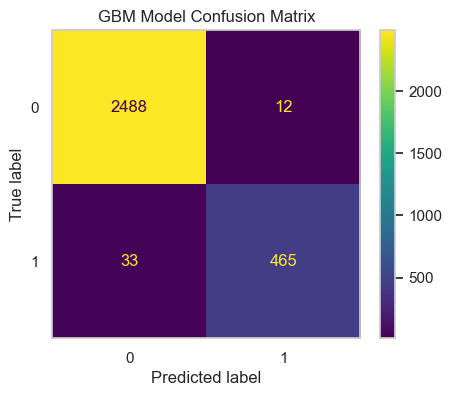

In [119]:
# Construct and plot confusion matrix of GBM model
cm = confusion_matrix(y_test_xgb, y_pred_xgb, labels=xgb_opt.classes_)

# Create the display for a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_opt.classes_)

# Plot
disp.plot(values_format='')
plt.grid(False)
plt.title("GBM Model Confusion Matrix")
plt.show()

### Decision Thresholds and ROC and PR Curves 

In [120]:
# Get predicted probabilities
y_prob_xgb = xgb_opt.predict_proba(X_test_xgb)[:, 1]

# Define a range of thresholds
thresholds_xgb = [0.1, 0.2, 0.25, 0.35, 0.3, 0.4, 0.5, 0.6, 0.7]

# Initialize lists to store metric values
accuracy_scores_xgb = []
precision_scores_xgb = []
recall_scores_xgb = []
f1_scores_xgb = []
roc_auc_scores_xgb = []
pr_auc_scores_xgb = []

for threshold in thresholds_xgb:
    y_pred_threshold_xgb = (y_prob_xgb >= threshold).astype(int)
    accuracy_scores_xgb.append(accuracy_score(y_test_xgb, y_pred_threshold_xgb))
    precision_scores_xgb.append(precision_score(y_test_xgb, y_pred_threshold_xgb))
    recall_scores_xgb.append(recall_score(y_test_xgb, y_pred_threshold_xgb))
    f1_scores_xgb.append(f1_score(y_test_xgb, y_pred_threshold_xgb))
    roc_auc_scores_xgb.append(roc_auc_score(y_test_xgb, y_pred_threshold_xgb))
    pr_auc_scores_xgb.append(average_precision_score(y_test_xgb, y_pred_threshold_xgb))

columns = ["model", "accuracy", "precision", "recall", "f1", "roc_auc", "pr_auc"]
model_xgb = ["Gradient Boosting 0.1",
            "Gradient Boosting 0.2",
            "Gradient Boosting 0.25",
            "Gradient Boosting 0.3",
            "Gradient Boosting 0.35",
            "Gradient Boosting 0.4",
            "Gradient Boosting 0.5",
            "Gradient Boosting 0.6",
            "Gradient Boosting 0.7"]

# Create a dictionary with column names as keys and corresponding values as lists of model and evaluation scores
xgb_threshold_scores = {
    columns[0]: model_xgb,
    columns[1]: accuracy_scores_xgb,
    columns[2]: precision_scores_xgb,
    columns[3]: recall_scores_xgb,
    columns[4]: f1_scores_xgb,
    columns[5]: roc_auc_scores_xgb,
    columns[6]: pr_auc_scores_xgb
}

# Create the DataFrame
df_xgb_scores = pd.DataFrame(xgb_threshold_scores)

df_xgb_scores

model  accuracy  precision    recall        f1   roc_auc  \
0   Gradient Boosting 0.1  0.947965   0.781250  0.953815  0.858951  0.950308   
1   Gradient Boosting 0.2  0.972648   0.895437  0.945783  0.919922  0.961892   
2  Gradient Boosting 0.25  0.978319   0.928713  0.941767  0.935194  0.963684   
3   Gradient Boosting 0.3  0.982989   0.957055  0.939759  0.948328  0.965680   
4  Gradient Boosting 0.35  0.980654   0.943548  0.939759  0.941650  0.964280   
5   Gradient Boosting 0.4  0.983656   0.964803  0.935743  0.950051  0.964471   
6   Gradient Boosting 0.5  0.984990   0.974843  0.933735  0.953846  0.964467   
7   Gradient Boosting 0.6  0.984990   0.980892  0.927711  0.953560  0.962055   
8   Gradient Boosting 0.7  0.983322   0.984848  0.913655  0.947917  0.955427   

     pr_auc  
0  0.752840  
1  0.855895  
2  0.884304  
3  0.909408  
4  0.896715  
5  0.913482  
6  0.921252  
7  0.921992  
8  0.914154

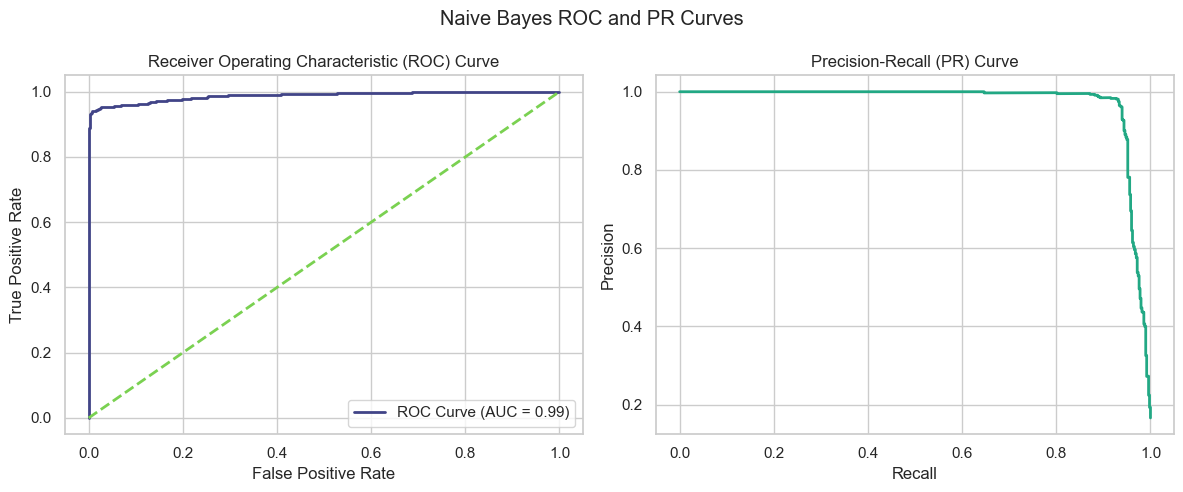

In [121]:
# Compute ROC and PR curves
colors = sns.color_palette("viridis", n_colors=4)

fpr, tpr, thresholds = roc_curve(y_test_xgb, y_prob_xgb)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test_xgb, y_prob_xgb)

# Create ROC and PR subplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color=colors[0], lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color=colors[3], lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color=colors[2], lw=2, label=f"PR Curve (AUC = {pr_auc_scores[-1]:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall (PR) Curve")

plt.suptitle("Naive Bayes ROC and PR Curves")
plt.tight_layout()
plt.show()

### Save Results

The decision threshold with the best F1 score is around 0.5.

In [122]:
df_xgb_results = df_xgb_scores.iloc[6:7]

results = pd.concat([results, df_xgb_results], ignore_index=True)
results

model  accuracy  precision    recall        f1   roc_auc  \
0  Logistic Regression 0.2  0.770180   0.384801  0.640562  0.480784  0.718281   
1       Gaussian Bayes 0.4  0.785857   0.432203  0.921687  0.588462  0.840243   
2        Decision Tree 0.7  0.982910   0.970976  0.924623  0.947233  0.959563   
3    Gradient Boosting 0.5  0.984990   0.974843  0.933735  0.953846  0.964467   

     pr_auc  
0  0.306195  
1  0.411365  
2  0.910292  
3  0.921252

### Feature Importance

In [123]:
# Get feature importances
xgb_importance = xgb_opt.feature_importances_
xgb_feature_names = X_train_xgb.columns  # Assuming X_train is a DataFrame

# Create a DataFrame to store feature importances
df_xgb_importance = pd.DataFrame({'Feature': xgb_feature_names, 'Importance': xgb_importance})

# Sort features by importance
df_xgb_importance = df_xgb_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

df_xgb_importance

Feature  Importance
0       satisfaction_level    0.158215
1         years_at_company    0.145962
2                  endures    0.119074
3               work_level    0.114714
4       number_of_projects    0.092172
5    average_monthly_hours    0.086480
6          last_evaluation    0.072804
7               stagnation    0.065757
8        under_compensated    0.042775
9             unrecognised    0.041613
10           work_accident    0.037605
11            salary_level    0.014589
12  promotion_last_5_years    0.004710
13       low_turnover_dept    0.003529

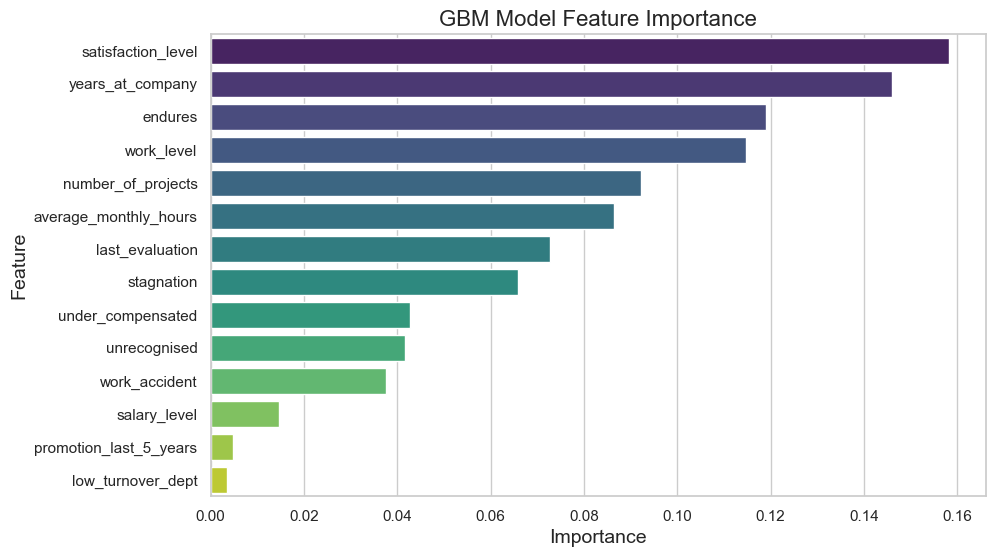

In [124]:
# Create a bar plot using
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_xgb_importance, palette='viridis')
plt.title('GBM Model Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

In [125]:
# Show coefficient values in a table
df_xgb_importance.T

0                 1         2           3   \
Feature     satisfaction_level  years_at_company   endures  work_level   
Importance            0.158215          0.145962  0.119074    0.114714   

                            4                      5                6   \
Feature     number_of_projects  average_monthly_hours  last_evaluation   
Importance            0.092172                0.08648         0.072804   

                    7                  8             9              10  \
Feature     stagnation  under_compensated  unrecognised  work_accident   
Importance    0.065757           0.042775      0.041613       0.037605   

                      11                      12                 13  
Feature     salary_level  promotion_last_5_years  low_turnover_dept  
Importance      0.014589                 0.00471           0.003529

### Interpret Results

#### A. Evaluation Metrics

The ROC AUC and the PR curve have near perfect forms, hugging the edges almost to the corner of the quadrant. This indicates how strong this model is; a high TP rate doesn't compromise a high TN rate, and a high recall doesn't compromise a high precision score. 

#### B. Feature Importance

As with the logistic regression and decision tree models, `satisfaction_level` came out as the most important predictor of employee churn. Features like `years_at_company` and `work_level` were also important. The only extracted feature with some importance is `endures`, although this is to be expected given that it is comprised of the two most important features (satisfaction and years). Therefore, engineered features did not add much to the model's performance (`work_level` is slightly more predictive than `average_monthly_hours`). To further refine the model, the extracted features `average_monthly_hours` and `endures` can be removed to see the effect on the model's predictive power.

Regardless of possible minor improvements, it's clear at this stage that the most significant indicators of whether an employee will leave are their satisfaction, their evaluation, how many years they've been at the company, their number of projects, and their work hours.


### Takeaways

1. The GBM model provides a strongly reliable algorithm for predicting employee turnover with a F1 score of 95%
2. While the GBM model is marginally stronger, the decision tree (F1 score of 94.7%) is more interpretable. It's difficult to understand why the GBM model's classification was based on the features it found most predictive given the ensemble method, but it's easier to understand the difference features make in the decision tree model.
4. An employee's satisfaction, time at the company, work hours, and number of projects are the strongest indicators of whether they will leave the company.
5. Certain extracted features are not as important in this model as in the decision tree.

***

## Assess Models' Utility for Project Goals

The advanced end models provided excellent performance metrics. However, which one should be used depends on the specific goals for HR's retention strategy development. While the GBM model is marginally stronger, the decision tree is more interpretable. It's difficult to understand why the GBM model's classification was based on those features it found most predictive given the ensemble method. But it's easier to understand the difference features make in the decision tree's model.

However, regardless of the final model chosen or any possible minor improvements, it's clear at this stage that the most significant indicators of whether an employee will leave are their satisfaction, their evaluation, how many years they've been at the company, their number of projects, and their work hours. These insights have important business application for the development of an effective retention strategy &ndash; as is discussed at length below &ndash; although there is still room for further research and investigation to gain a finer-grained understanding of the causal structures of employee turnover.

Apart from a general retention strategy, this model is well suited for making predictions on individual employees. Data on current employees can be predicted on in order to identify individuals at a high risk of leaving the company. These individuals can then be proactively approached with appropriate measures or incentives to increase the likelihood of their retention.

## Key Findings

Based on the two top performing models, the biggest predictors of employee churn are:

1. **Satisfaction**
   1. Both low and high satisfaction levels are associated with an employee leaving the company.
   2. It is not surprising that workers with lower employment satisfaction will leave, but there are employees with relatively high satisfaction who also tend to leave, as well as some employees with very low satisfaction levels that on average have lower rates of turnover.
   3. The exact nature of satisfaction's influence on employee churn needs further investigation; there could be one aspect that is part of an employees satisfaction that has a clear determinative effect on employee turnover.</br></br>
2. **Years at company**
   1. Like satisfaction, this appears to be a complex predictor; employees who have been at the company for fewer and more years tend to leave the company at a lower rate.
   2. It should be further investigated why 'middle-tenure' employees tend to leave.</br></br>
3. **Endurance**
   1. This was the only extracted feature that had a high importance; it indicates which employees have below average satisfaction and have been at the company for two or more years.
   2. It makes sense that this feature ranks high on the importance scale given that satisfaction and years at company are both important predictors.
   3. This feature may be further refined by changing the conditions, e.g., lowering the satisafction level to a certain percentile and/or increasing the number of years an employee has worked at the company.</br></br>
4. **Work level and number of projects**
   1. These factors are also complex predictors of employee churn; both higher and lower rates of hours worked and project involvement are associated with employees leaving the company. 

**Other Notable Findings**

* The rate of promotion in the company is very low. HR would benefit from considering whether there is a clear process in place for employee promotion or pay progression based on employee evaluation.

* There is a disparity between employees who work on a high number of projects and for a high number of hours; this should be managed better to avoid burnout and potentially also increase satisfaction and thus retention.

* R&D and management have lower rates of turnover; this could be investigated further, especially since satisfaction levels appear the same in these departments as in others:

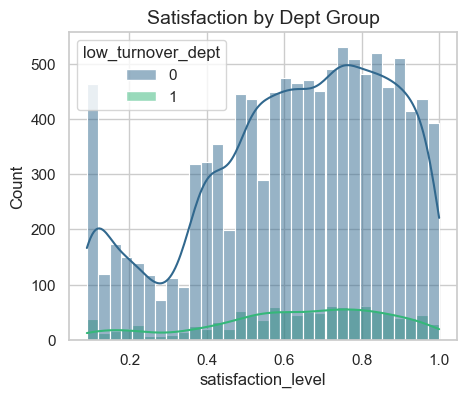

In [126]:
# Inspect satisfaction_level distributions for R&D and management vs other departments
kde(data=df_xgb, feature="satisfaction_level", group="low_turnover_dept", title="Satisfaction by Dept Group")

Low turnover departments don't have a noticably different `satsifaction_level` distribution compared to other departments. This is interesting and raises the question:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*If `satisfaction_level` is the strongest predictor of employee churn, why is there*</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*a lower churn rate in these two departments when they have similar satisfaction levels?*

It would be worth investigating what keeps employees in these departments more than others, all other factors remaining constant. Management and R&D employees may have higher salaries, which could explain lower turnover. Whatever is found to explain this difference, there could be an insight into conditions that could be replicated in other departments to marginally improve their retention.

**CONCLUSION**

From the data we have discovered that there is clearly a range of complex relationships that negatively affect employee retention. Factors such as an employee's satisfaction level, their tenure, work level, and even specific department are associated in a non-linear manner with turnover. These factors need to be further investigated in order for a more precise understanding of why employees leave the company and, therefore, inform HR's strategy to improve retention. However, even without a further investigation, HR can benefit from considering implementing simple, tentatative measures to address these factors to improve retention. For example, a mentorship programme can be set up for newer employees and long-service awards for older employees. Finally, other management-level concerns not directly associated with employee retention surfaced in the course of the analysis. For example, a high number of employees working excessive hours or on an above-average number of projects indicates that the time and productivity of those employees is not being appropriately managed. And a low promotion rate despite employees with high evaluations means that there is not a clear promotion track in place.